In [2]:
"""This tutorial shows how to train an MATD3 agent on the simple speaker listener multi-particle environment.

Authors: Michael (https://github.com/mikepratt1), Nickua (https://github.com/nicku-a)
"""

import os

import matplotlib.pyplot as plt
import numpy as np
import torch
from pettingzoo.mpe import simple_speaker_listener_v4
from mpe2 import simple_speaker_listener_v4

from agilerl.algorithms import MATD3
from agilerl.algorithms.core.registry import HyperparameterConfig, RLParameter
from agilerl.components.multi_agent_replay_buffer import MultiAgentReplayBuffer
from agilerl.hpo.mutation import Mutations
from agilerl.hpo.tournament import TournamentSelection
from agilerl.utils.utils import (
    create_population,
    default_progress_bar,
    make_multi_agent_vect_envs,
)

/tmp/ipykernel_17018/4085195098.py:11: DeprecationWarning: The environment `pettingzoo.mpe` has been moved to `mpe2` and will be removed in a future release.Please update your imports.
  from pettingzoo.mpe import simple_speaker_listener_v4


[2025-11-25 15:33:31,319] [WARNING] [real_accelerator.py:209:get_accelerator] Setting accelerator to CPU. If you have GPU or other accelerator, we were unable to detect it.


/home/franc/miniconda3/envs/projeto_rl/compiler_compat/ld: cannot find -laio: No such file or directory
collect2: error: ld returned 1 exit status


INFO 11-25 15:33:53 [__init__.py:239] No platform detected, vLLM is running on UnspecifiedPlatform
WARNING 11-25 15:33:56 [_custom_ops.py:20] Failed to import from vllm._C with ImportError('libcuda.so.1: cannot open shared object file: No such file or directory')


===== AgileRL Online Multi-Agent Demo =====
Training...


🚀 Training Progress │   0% │                      │ 10000/2000000 steps │ ⏱️ 01:22 │ ⏳ 4:16:41 │ 129.20step/s 

--- Global steps 40000 ---
Steps [10000, 10000, 10000, 10000]
Scores: [-118.95751522469847, -166.01748545364805, -75.61194914252697, -102.14667320533869]
Fitnesses: ['-149.74', '-102.71', '-123.76', '-127.91']
5 fitness avgs: ['-149.74', '-102.71', '-123.76', '-127.91']
Mutations: [None, None, None, None]


🚀 Training Progress │   1% │ ▏                    │ 20000/2000000 steps │ ⏱️ 02:39 │ ⏳ 4:11:51 │ 131.03step/s 

--- Global steps 80000 ---
Steps [20000, 20000, 20000, 20000]
Scores: [-166.88957554790488, -101.28666560552608, -101.58660914663804, -137.17620205732845]
Fitnesses: ['-213.34', '-77.96', '-147.20', '-78.52']
5 fitness avgs: ['-158.02', '-90.34', '-148.47', '-90.61']
Mutations: ['None', 'lr_actor', 'None', 'lr_actor']


🚀 Training Progress │   2% │ ▎                    │ 30000/2000000 steps │ ⏱️ 04:12 │ ⏳ 4:41:32 │ 116.62step/s 

--- Global steps 120000 ---
Steps [30000, 30000, 30000, 30000]
Scores: [-103.63864479331123, -109.41242939911392, -140.67948000459114, -132.3023509911725]
Fitnesses: ['-98.16', '-120.67', '-209.11', '-150.80']
5 fitness avgs: ['-92.94', '-100.45', '-130.11', '-110.49']
Mutations: ['None', 'None', 'param', 'None']


🚀 Training Progress │   2% │ ▍                    │ 40000/2000000 steps │ ⏱️ 05:34 │ ⏳ 4:22:32 │ 124.42step/s 

--- Global steps 160000 ---
Steps [40000, 40000, 40000, 40000]
Scores: [-108.16608938458562, -100.09083296625352, -112.83959901741495, -116.7669488809165]
Fitnesses: ['-73.59', '-57.30', '-59.25', '-93.35']
5 fitness avgs: ['-88.10', '-84.03', '-84.52', '-98.67']
Mutations: ['None', 'learn_step', 'None', 'param']


🚀 Training Progress │   2% │ ▌                    │ 50000/2000000 steps │ ⏱️ 06:58 │ ⏳ 4:21:59 │ 124.05step/s 

--- Global steps 200000 ---
Steps [50000, 50000, 50000, 50000]
Scores: [-69.9197035742081, -90.12591529147998, -85.45624520920609, -81.38744092874303]
Fitnesses: ['-77.95', '-86.16', '-91.23', '-119.79']
5 fitness avgs: ['-82.82', '-84.85', '-85.47', '-91.57']
Mutations: ['None', 'None', 'None', 'encoder.add_node']


🚀 Training Progress │   3% │ ▌                    │ 60000/2000000 steps │ ⏱️ 08:28 │ ⏳ 4:28:01 │ 120.64step/s 

--- Global steps 240000 ---
Steps [60000, 60000, 60000, 60000]
Scores: [-72.64097907211868, -85.68622540291119, -78.07801419299689, -68.75310026249007]
Fitnesses: ['-67.81', '-82.23', '-87.30', '-114.21']
5 fitness avgs: ['-75.84', '-78.72', '-79.73', '-87.15']
Mutations: ['None', 'batch_size', 'None', 'remove_latent_node']


🚀 Training Progress │   4% │ ▋                    │ 70000/2000000 steps │ ⏱️ 10:00 │ ⏳ 4:45:56 │ 112.49step/s 

--- Global steps 280000 ---
Steps [70000, 70000, 70000, 70000]
Scores: [-70.7858878543367, -71.61251062911036, -135.6314715761439, -84.49659256206925]
Fitnesses: ['-81.72', '-165.29', '-55.83', '-75.79']
5 fitness avgs: ['-76.59', '-93.30', '-82.72', '-78.29']
Mutations: ['None', 'None', 'None', 'encoder.add_node']


🚀 Training Progress │   4% │ ▊                    │ 80000/2000000 steps │ ⏱️ 11:44 │ ⏳ 5:09:47 │ 103.30step/s 

--- Global steps 320000 ---
Steps [80000, 80000, 80000, 80000]
Scores: [-125.59626616504507, -74.01886439824966, -71.00294231613837, -109.66666045736834]
Fitnesses: ['-164.66', '-73.98', '-68.13', '-168.57']
5 fitness avgs: ['-89.89', '-73.45', '-70.58', '-107.38']
Mutations: ['batch_size', 'None', 'None', 'param']


🚀 Training Progress │   4% │ ▉                    │ 90000/2000000 steps │ ⏱️ 13:55 │ ⏳ 6:25:52 │ 82.50step/s 

--- Global steps 360000 ---
Steps [90000, 90000, 90000, 90000]
Scores: [-381.90110537584303, -96.94876833170747, -91.79468603825119, -71.321517619898]
Fitnesses: ['-415.84', '-85.75', '-86.83', '-140.90']
5 fitness avgs: ['-142.29', '-79.14', '-79.36', '-87.30']
Mutations: ['remove_latent_node', 'None', 'param', 'None']


🚀 Training Progress │   5% │ █                    │ 100000/2000000 steps │ ⏱️ 15:53 │ ⏳ 6:00:16 │ 87.90step/s 

--- Global steps 400000 ---
Steps [100000, 100000, 100000, 100000]
Scores: [-108.30855183334366, -87.70866048717329, -78.55759368083316, -238.37696345354613]
Fitnesses: ['-124.73', '-56.28', '-78.33', '-188.70']
5 fitness avgs: ['-88.50', '-74.81', '-79.22', '-164.44']
Mutations: ['None', 'param', 'lr_actor', 'lr_critic']


🚀 Training Progress │   6% │ █                    │ 110000/2000000 steps │ ⏱️ 17:29 │ ⏳ 5:17:25 │ 99.24step/s 

--- Global steps 440000 ---
Steps [110000, 110000, 110000, 110000]
Scores: [-77.61390622864472, -84.69692098046103, -81.59170964007649, -70.16166845106136]
Fitnesses: ['-69.67', '-74.91', '-55.60', '-70.09']
5 fitness avgs: ['-72.29', '-73.34', '-73.89', '-72.38']
Mutations: ['learn_step', 'None', 'None', 'None']


🚀 Training Progress │   6% │ █▏                   │ 120000/2000000 steps │ ⏱️ 19:08 │ ⏳ 5:07:50 │ 101.78step/s 

--- Global steps 480000 ---
Steps [120000, 120000, 120000, 120000]
Scores: [-65.71582533385889, -52.93089964819001, -55.547183367517334, -76.66326755685392]
Fitnesses: ['-47.57', '-41.14', '-54.50', '-63.10']
5 fitness avgs: ['-66.65', '-65.45', '-68.12', '-70.80']
Mutations: ['param', 'learn_step', 'lr_critic', 'None']


🚀 Training Progress │   6% │ █▎                   │ 130000/2000000 steps │ ⏱️ 20:57 │ ⏳ 5:23:38 │ 96.30step/s 

--- Global steps 520000 ---
Steps [130000, 130000, 130000, 130000]
Scores: [-59.68726198424747, -46.57261499233666, -65.45259195404036, -54.17469806294265]
Fitnesses: ['-53.47', '-37.92', '-49.00', '-87.18']
5 fitness avgs: ['-61.35', '-58.24', '-61.66', '-68.09']
Mutations: ['param', 'None', 'None', 'param']


🚀 Training Progress │   7% │ █▍                   │ 140000/2000000 steps │ ⏱️ 22:52 │ ⏳ 5:43:55 │ 90.13step/s 

--- Global steps 560000 ---
Steps [140000, 140000, 140000, 140000]
Scores: [-48.3751413307793, -44.7732265242596, -52.2757025863737, -49.720786560711666]
Fitnesses: ['-52.85', '-36.48', '-35.58', '-56.47']
5 fitness avgs: ['-51.66', '-51.49', '-51.31', '-52.38']
Mutations: ['learn_step', 'lr_actor', 'param', 'batch_size']


🚀 Training Progress │   8% │ █▌                   │ 150000/2000000 steps │ ⏱️ 25:00 │ ⏳ 6:35:22 │ 77.98step/s 

--- Global steps 600000 ---
Steps [150000, 150000, 150000, 150000]
Scores: [-42.14035212851306, -42.28722196827016, -47.47648863599964, -45.05481578831741]
Fitnesses: ['-46.21', '-31.25', '-41.12', '-40.74']
5 fitness avgs: ['-49.30', '-46.30', '-48.62', '-48.38']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │   8% │ █▌                   │ 160000/2000000 steps │ ⏱️ 27:59 │ ⏳ 8:09:38 │ 62.63step/s 

--- Global steps 640000 ---
Steps [160000, 160000, 160000, 160000]
Scores: [-40.22239163177321, -39.57036503230991, -45.73718183575533, -44.32040377905707]
Fitnesses: ['-40.74', '-42.05', '-41.66', '-33.64']
5 fitness avgs: ['-40.43', '-42.77', '-42.70', '-39.01']
Mutations: ['param', 'param', 'None', 'None']


🚀 Training Progress │   8% │ █▋                   │ 170000/2000000 steps │ ⏱️ 30:19 │ ⏳ 7:15:02 │ 70.11step/s 

--- Global steps 680000 ---
Steps [170000, 170000, 170000, 170000]
Scores: [-78.64865633797535, -37.952529307740264, -53.81132028023384, -43.809811942514536]
Fitnesses: ['-70.93', '-46.74', '-60.45', '-49.47']
5 fitness avgs: ['-44.97', '-41.55', '-42.88', '-40.68']
Mutations: ['remove_latent_node', 'None', 'None', 'None']


🚀 Training Progress │   9% │ █▊                   │ 180000/2000000 steps │ ⏱️ 33:35 │ ⏳ 9:34:36 │ 52.79step/s 

--- Global steps 720000 ---
Steps [180000, 180000, 180000, 180000]
Scores: [-67.88410472457052, -52.810974725780724, -55.71067162211668, -67.30337244219717]
Fitnesses: ['-59.37', '-60.18', '-83.61', '-66.87']
5 fitness avgs: ['-41.86', '-42.02', '-46.71', '-44.23']
Mutations: ['lr_actor', 'None', 'None', 'head_net.remove_node']


🚀 Training Progress │  10% │ █▉                   │ 190000/2000000 steps │ ⏱️ 36:31 │ ⏳ 8:49:27 │ 56.98step/s 

--- Global steps 760000 ---
Steps [190000, 190000, 190000, 190000]
Scores: [-64.02449637608078, -105.68930548461849, -47.03196439951029, -54.296881504869525]
Fitnesses: ['-50.54', '-56.97', '-36.79', '-58.21']
5 fitness avgs: ['-44.85', '-48.51', '-42.10', '-51.24']
Mutations: ['None', 'None', 'lr_actor', 'None']


🚀 Training Progress │  10% │ ██                   │ 200000/2000000 steps │ ⏱️ 39:00 │ ⏳ 7:31:27 │ 66.45step/s 

--- Global steps 800000 ---
Steps [200000, 200000, 200000, 200000]
Scores: [-43.5645277616517, -50.74532866167347, -48.346575222011, -37.9756124677762]
Fitnesses: ['-34.49', '-80.09', '-37.08', '-37.79']
5 fitness avgs: ['-42.75', '-61.00', '-52.40', '-49.82']
Mutations: ['None', 'None', 'learn_step', 'batch_size']


🚀 Training Progress │  10% │ ██                   │ 210000/2000000 steps │ ⏱️ 41:19 │ ⏳ 6:42:20 │ 74.15step/s 

--- Global steps 840000 ---
Steps [210000, 210000, 210000, 210000]
Scores: [-42.48258438334092, -46.664786435459426, -56.17741896375986, -36.855677990141324]
Fitnesses: ['-40.34', '-40.11', '-70.83', '-30.21']
5 fitness avgs: ['-44.09', '-44.05', '-59.84', '-42.07']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  11% │ ██▏                  │ 220000/2000000 steps │ ⏱️ 43:39 │ ⏳ 6:41:47 │ 73.83step/s 

--- Global steps 880000 ---
Steps [220000, 220000, 220000, 220000]
Scores: [-35.14905788878114, -34.367794360074875, -37.49317829232386, -41.21791067501249]
Fitnesses: ['-31.41', '-30.03', '-45.50', '-44.01']
5 fitness avgs: ['-38.45', '-38.18', '-41.27', '-42.96']
Mutations: ['None', 'None', 'learn_step', 'encoder.remove_node']


🚀 Training Progress │  12% │ ██▎                  │ 230000/2000000 steps │ ⏱️ 46:06 │ ⏳ 6:52:36 │ 71.50step/s 

--- Global steps 920000 ---
Steps [230000, 230000, 230000, 230000]
Scores: [-40.782501702974685, -38.986450425744266, -41.00637694797601, -60.673934668725636]
Fitnesses: ['-37.29', '-41.67', '-43.92', '-38.02']
5 fitness avgs: ['-33.76', '-34.91', '-35.09', '-33.91']
Mutations: ['None', 'None', 'None', 'remove_latent_node']


🚀 Training Progress │  12% │ ██▍                  │ 240000/2000000 steps │ ⏱️ 48:26 │ ⏳ 6:43:46 │ 72.65step/s 

--- Global steps 960000 ---
Steps [240000, 240000, 240000, 240000]
Scores: [-47.48862230104611, -45.629717193443305, -49.89143000453016, -46.26777306216166]
Fitnesses: ['-51.19', '-43.51', '-57.89', '-45.81']
5 fitness avgs: ['-36.64', '-35.11', '-39.31', '-35.57']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  12% │ ██▌                  │ 250000/2000000 steps │ ⏱️ 50:52 │ ⏳ 6:40:37 │ 72.80step/s 

--- Global steps 1000000 ---
Steps [250000, 250000, 250000, 250000]
Scores: [-51.51438355225502, -52.114474423373395, -46.423749850156135, -40.430887264016135]
Fitnesses: ['-36.19', '-53.31', '-44.46', '-42.38']
5 fitness avgs: ['-35.44', '-38.87', '-37.10', '-37.14']
Mutations: ['add_latent_node', 'None', 'None', 'lr_actor']


🚀 Training Progress │  13% │ ██▌                  │ 260000/2000000 steps │ ⏱️ 53:27 │ ⏳ 7:03:04 │ 68.54step/s 

--- Global steps 1040000 ---
Steps [260000, 260000, 260000, 260000]
Scores: [-56.6831297634995, -76.89726772305323, -35.15502760373556, -50.07008072482371]
Fitnesses: ['-37.90', '-34.07', '-35.71', '-26.99']
5 fitness avgs: ['-36.98', '-36.22', '-36.54', '-34.80']
Mutations: ['None', 'param', 'None', 'learn_step']


🚀 Training Progress │  14% │ ██▋                  │ 270000/2000000 steps │ ⏱️ 56:50 │ ⏳ 9:27:35 │ 50.80step/s 

--- Global steps 1080000 ---
Steps [270000, 270000, 270000, 270000]
Scores: [-35.08351246590182, -37.87314077058744, -39.8643517346294, -35.236393061371565]
Fitnesses: ['-39.18', '-35.86', '-42.12', '-37.54']
5 fitness avgs: ['-36.63', '-35.97', '-38.63', '-38.48']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  14% │ ██▊                  │ 280000/2000000 steps │ ⏱️ 59:11 │ ⏳ 7:09:50 │ 66.69step/s 

--- Global steps 1120000 ---
Steps [280000, 280000, 280000, 280000]
Scores: [-35.62624165105405, -30.668127234454577, -33.806542453426204, -37.88686291852]
Fitnesses: ['-32.85', '-30.95', '-25.32', '-31.94']
5 fitness avgs: ['-35.08', '-35.37', '-33.57', '-35.56']
Mutations: ['lr_actor', 'None', 'batch_size', 'lr_critic']


🚀 Training Progress │  14% │ ██▉                  │ 290000/2000000 steps │ ⏱️ 1:01:49 │ ⏳ 7:26:54 │ 63.77step/s 

--- Global steps 1160000 ---
Steps [290000, 290000, 290000, 290000]
Scores: [-39.266403143136074, -37.88011292741384, -213.8994643540393, -38.94832416126321]
Fitnesses: ['-40.12', '-38.00', '-34.12', '-36.59']
5 fitness avgs: ['-32.90', '-34.26', '-33.20', '-32.19']
Mutations: ['batch_size', 'None', 'add_latent_node', 'lr_critic']


🚀 Training Progress │  15% │ ███                  │ 300000/2000000 steps │ ⏱️ 1:04:14 │ ⏳ 6:40:38 │ 70.72step/s 

--- Global steps 1200000 ---
Steps [300000, 300000, 300000, 300000]
Scores: [-42.24641876742672, -39.620034502573496, -38.541941979752124, -38.867788598519276]
Fitnesses: ['-49.36', '-41.33', '-37.99', '-31.43']
5 fitness avgs: ['-34.83', '-33.92', '-33.26', '-31.94']
Mutations: ['head_net.remove_node', 'lr_critic', 'param', 'param']


🚀 Training Progress │  16% │ ███                  │ 310000/2000000 steps │ ⏱️ 1:06:41 │ ⏳ 6:24:13 │ 73.31step/s 

--- Global steps 1240000 ---
Steps [310000, 310000, 310000, 310000]
Scores: [-41.121785848084265, -291.6424283409244, -38.22230757099029, -36.903369877382545]
Fitnesses: ['-40.47', '-244.11', '-37.42', '-31.80']
5 fitness avgs: ['-34.64', '-77.35', '-34.03', '-34.22']
Mutations: ['param', 'add_latent_node', 'None', 'None']


🚀 Training Progress │  16% │ ███▏                 │ 320000/2000000 steps │ ⏱️ 1:09:03 │ ⏳ 6:36:37 │ 70.60step/s 

--- Global steps 1280000 ---
Steps [320000, 320000, 320000, 320000]
Scores: [-38.60703103500077, -38.61717019380086, -35.85463651480395, -37.734190089425276]
Fitnesses: ['-37.94', '-38.61', '-34.48', '-37.84']
5 fitness avgs: ['-34.45', '-35.19', '-33.76', '-34.43']
Mutations: ['lr_actor', 'None', 'lr_critic', 'None']


🚀 Training Progress │  16% │ ███▎                 │ 330000/2000000 steps │ ⏱️ 1:12:16 │ ⏳ 7:47:42 │ 59.51step/s 

--- Global steps 1320000 ---
Steps [330000, 330000, 330000, 330000]
Scores: [-36.944745978730076, -35.804296081650826, -40.157369206102025, -44.561390978240695]
Fitnesses: ['-36.38', '-58.61', '-48.05', '-49.43']
5 fitness avgs: ['-35.97', '-41.10', '-38.30', '-38.58']
Mutations: ['encoder.add_node', 'None', 'batch_size', 'None']


🚀 Training Progress │  17% │ ███▍                 │ 340000/2000000 steps │ ⏱️ 1:15:21 │ ⏳ 8:29:59 │ 54.25step/s 

--- Global steps 1360000 ---
Steps [340000, 340000, 340000, 340000]
Scores: [-43.77693832042489, -53.24252485121629, -43.64107699901272, -56.529104973677]
Fitnesses: ['-44.98', '-43.00', '-46.84', '-43.86']
5 fitness avgs: ['-36.94', '-39.15', '-37.31', '-39.33']
Mutations: ['param', 'None', 'None', 'None']


🚀 Training Progress │  18% │ ███▌                 │ 350000/2000000 steps │ ⏱️ 1:17:31 │ ⏳ 6:03:59 │ 75.55step/s 

--- Global steps 1400000 ---
Steps [350000, 350000, 350000, 350000]
Scores: [-49.27430761721251, -44.99818760101363, -52.363330826099045, -46.330378621963185]
Fitnesses: ['-49.55', '-43.27', '-45.59', '-43.50']
5 fitness avgs: ['-40.56', '-39.68', '-39.77', '-39.35']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  18% │ ███▌                 │ 360000/2000000 steps │ ⏱️ 1:19:15 │ ⏳ 4:46:51 │ 95.28step/s 

--- Global steps 1440000 ---
Steps [360000, 360000, 360000, 360000]
Scores: [-43.14550823637197, -49.3682981331251, -51.18552174447167, -46.02882032480073]
Fitnesses: ['-61.85', '-46.10', '-47.47', '-39.74']
5 fitness avgs: ['-44.24', '-41.41', '-41.69', '-40.14']
Mutations: ['lr_actor', 'param', 'lr_critic', 'lr_critic']


🚀 Training Progress │  18% │ ███▋                 │ 370000/2000000 steps │ ⏱️ 1:20:50 │ ⏳ 4:14:06 │ 106.91step/s 

--- Global steps 1480000 ---
Steps [370000, 370000, 370000, 370000]
Scores: [-50.414369926227025, -51.09371851969952, -52.622517214778235, -45.39937371623011]
Fitnesses: ['-49.48', '-83.26', '-53.58', '-47.05']
5 fitness avgs: ['-43.14', '-51.45', '-43.96', '-43.93']
Mutations: ['learn_step', 'None', 'None', 'None']


🚀 Training Progress │  19% │ ███▊                 │ 380000/2000000 steps │ ⏱️ 1:22:44 │ ⏳ 4:43:05 │ 95.38step/s 

--- Global steps 1520000 ---
Steps [380000, 380000, 380000, 380000]
Scores: [-67.39416192543868, -55.133432524533426, -51.117049026726846, -45.437056553682325]
Fitnesses: ['-46.16', '-56.12', '-47.33', '-39.05']
5 fitness avgs: ['-45.10', '-55.39', '-45.33', '-44.46']
Mutations: ['head_net.add_node', 'None', 'None', 'None']


🚀 Training Progress │  20% │ ███▉                 │ 390000/2000000 steps │ ⏱️ 1:24:33 │ ⏳ 4:37:38 │ 96.65step/s 

--- Global steps 1560000 ---
Steps [390000, 390000, 390000, 390000]
Scores: [-53.22819505410404, -57.883823177945615, -52.21079718451778, -43.00321888209834]
Fitnesses: ['-40.45', '-72.37', '-46.95', '-37.71']
5 fitness avgs: ['-43.18', '-60.50', '-45.35', '-43.27']
Mutations: ['learn_step', 'None', 'None', 'None']


🚀 Training Progress │  20% │ ████                 │ 400000/2000000 steps │ ⏱️ 1:26:13 │ ⏳ 4:17:57 │ 103.37step/s 

--- Global steps 1600000 ---
Steps [400000, 400000, 400000, 400000]
Scores: [-40.12429552258315, -35.97372161084209, -41.04413754703459, -36.28773744897742]
Fitnesses: ['-38.65', '-33.45', '-60.86', '-39.98']
5 fitness avgs: ['-42.26', '-41.31', '-46.70', '-42.61']
Mutations: ['encoder.add_node', 'None', 'learn_step', 'None']


🚀 Training Progress │  20% │ ████                 │ 410000/2000000 steps │ ⏱️ 1:27:54 │ ⏳ 4:14:44 │ 104.02step/s 

--- Global steps 1640000 ---
Steps [410000, 410000, 410000, 410000]
Scores: [-44.48663296809258, -38.5411954219478, -37.11312440825061, -43.484180977661055]
Fitnesses: ['-30.75', '-30.94', '-39.54', '-37.52']
5 fitness avgs: ['-39.51', '-39.23', '-41.27', '-40.86']
Mutations: ['param', 'None', 'None', 'param']


🚀 Training Progress │  21% │ ████▏                │ 420000/2000000 steps │ ⏱️ 1:30:08 │ ⏳ 5:40:19 │ 77.38step/s 

--- Global steps 1680000 ---
Steps [420000, 420000, 420000, 420000]
Scores: [-37.6562121975259, -34.68581162819706, -34.22607215144882, -36.88566695901179]
Fitnesses: ['-37.37', '-40.39', '-35.85', '-32.74']
5 fitness avgs: ['-37.29', '-37.89', '-36.99', '-36.36']
Mutations: ['lr_critic', 'None', 'None', 'None']


🚀 Training Progress │  22% │ ████▎                │ 430000/2000000 steps │ ⏱️ 1:32:17 │ ⏳ 5:01:58 │ 86.65step/s 

--- Global steps 1720000 ---
Steps [430000, 430000, 430000, 430000]
Scores: [-35.74063956259463, -34.05833951869514, -55.92444812478023, -37.21350891586605]
Fitnesses: ['-33.64', '-31.03', '-70.17', '-28.61']
5 fitness avgs: ['-35.28', '-34.76', '-44.12', '-34.28']
Mutations: ['learn_step', 'None', 'add_latent_node', 'None']


🚀 Training Progress │  22% │ ████▍                │ 440000/2000000 steps │ ⏱️ 1:33:53 │ ⏳ 4:13:31 │ 102.55step/s 

--- Global steps 1760000 ---
Steps [440000, 440000, 440000, 440000]
Scores: [-38.61296287837426, -37.21950943680375, -37.93485913176946, -41.573624292254934]
Fitnesses: ['-52.33', '-34.04', '-43.43', '-37.41']
5 fitness avgs: ['-36.65', '-34.00', '-34.87', '-34.67']
Mutations: ['lr_actor', 'encoder.remove_node', 'None', 'None']


🚀 Training Progress │  22% │ ████▌                │ 450000/2000000 steps │ ⏱️ 1:35:28 │ ⏳ 3:58:32 │ 108.30step/s 

--- Global steps 1800000 ---
Steps [450000, 450000, 450000, 450000]
Scores: [-37.05718649844811, -38.409025214760966, -40.11780473551051, -41.89202895842768]
Fitnesses: ['-37.88', '-36.09', '-50.49', '-35.41']
5 fitness avgs: ['-33.85', '-33.49', '-37.04', '-34.22']
Mutations: ['lr_actor', 'lr_critic', 'None', 'None']


🚀 Training Progress │  23% │ ████▌                │ 460000/2000000 steps │ ⏱️ 1:37:03 │ ⏳ 3:52:41 │ 110.30step/s 

--- Global steps 1840000 ---
Steps [460000, 460000, 460000, 460000]
Scores: [-43.64617485789144, -36.22698606024912, -38.776434218975574, -73.80514187773113]
Fitnesses: ['-34.89', '-35.79', '-30.40', '-43.74']
5 fitness avgs: ['-34.28', '-34.82', '-33.38', '-36.79']
Mutations: ['param', 'None', 'None', 'add_latent_node']


🚀 Training Progress │  24% │ ████▋                │ 470000/2000000 steps │ ⏱️ 1:38:41 │ ⏳ 4:00:08 │ 106.18step/s 

--- Global steps 1880000 ---
Steps [470000, 470000, 470000, 470000]
Scores: [-40.380423482927135, -33.889456744258815, -39.32742541697041, -38.456831624515445]
Fitnesses: ['-50.26', '-35.08', '-52.75', '-34.25']
5 fitness avgs: ['-36.89', '-35.29', '-37.38', '-34.58']
Mutations: ['param', 'None', 'remove_latent_node', 'None']


🚀 Training Progress │  24% │ ████▊                │ 480000/2000000 steps │ ⏱️ 1:40:18 │ ⏳ 3:55:22 │ 107.63step/s 

--- Global steps 1920000 ---
Steps [480000, 480000, 480000, 480000]
Scores: [-37.45936820386707, -33.38530220390889, -32.24050660020309, -35.98635599024051]
Fitnesses: ['-40.43', '-35.78', '-33.76', '-30.51']
5 fitness avgs: ['-35.94', '-37.31', '-35.31', '-33.96']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  24% │ ████▉                │ 490000/2000000 steps │ ⏱️ 1:41:56 │ ⏳ 3:53:09 │ 107.94step/s 

--- Global steps 1960000 ---
Steps [490000, 490000, 490000, 490000]
Scores: [-104.17069425524856, -33.264336912456386, -33.7313288005526, -31.11914938694113]
Fitnesses: ['-50.37', '-27.89', '-34.62', '-40.96']
5 fitness avgs: ['-37.22', '-32.73', '-35.43', '-36.69']
Mutations: ['add_latent_node', 'None', 'None', 'None']


🚀 Training Progress │  25% │ █████                │ 500000/2000000 steps │ ⏱️ 1:43:32 │ ⏳ 3:47:09 │ 110.06step/s 

--- Global steps 2000000 ---
Steps [500000, 500000, 500000, 500000]
Scores: [-36.19219250615604, -32.294725187365096, -47.952376709510844, -33.51715959134089]
Fitnesses: ['-22.51', '-29.78', '-40.32', '-30.59']
5 fitness avgs: ['-30.01', '-31.47', '-38.07', '-31.63']
Mutations: ['None', 'encoder.add_node', 'None', 'batch_size']


🚀 Training Progress │  26% │ █████                │ 510000/2000000 steps │ ⏱️ 1:45:09 │ ⏳ 3:46:49 │ 109.48step/s 

--- Global steps 2040000 ---
Steps [510000, 510000, 510000, 510000]
Scores: [-28.880490648213414, -31.2866238584631, -32.52494040991174, -29.447806011135523]
Fitnesses: ['-28.29', '-32.51', '-24.75', '-29.63']
5 fitness avgs: ['-28.69', '-31.15', '-27.99', '-28.96']
Mutations: ['None', 'batch_size', 'None', 'None']


🚀 Training Progress │  26% │ █████▏               │ 520000/2000000 steps │ ⏱️ 1:46:46 │ ⏳ 3:46:21 │ 108.97step/s 

--- Global steps 2080000 ---
Steps [520000, 520000, 520000, 520000]
Scores: [-33.895075819910915, -30.29115172938999, -29.93688751997771, -33.708885567084565]
Fitnesses: ['-26.33', '-30.43', '-27.25', '-26.11']
5 fitness avgs: ['-26.40', '-27.93', '-26.58', '-27.06']
Mutations: ['None', 'lr_critic', 'encoder.add_node', 'batch_size']


🚀 Training Progress │  26% │ █████▎               │ 530000/2000000 steps │ ⏱️ 1:48:25 │ ⏳ 3:49:50 │ 106.59step/s 

--- Global steps 2120000 ---
Steps [530000, 530000, 530000, 530000]
Scores: [-31.824147375086724, -43.61240166761645, -33.20795989955, -31.367610236839955]
Fitnesses: ['-25.02', '-37.68', '-32.70', '-28.34']
5 fitness avgs: ['-25.30', '-28.02', '-27.02', '-26.63']
Mutations: ['None', 'head_net.add_node', 'None', 'None']


🚀 Training Progress │  27% │ █████▍               │ 540000/2000000 steps │ ⏱️ 1:50:04 │ ⏳ 3:48:57 │ 106.28step/s 

--- Global steps 2160000 ---
Steps [540000, 540000, 540000, 540000]
Scores: [-30.32067802736953, -34.04023221430302, -31.06524217539022, -31.219319664563162]
Fitnesses: ['-35.08', '-35.54', '-27.37', '-41.07']
5 fitness avgs: ['-26.74', '-28.16', '-26.52', '-29.26']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  28% │ █████▌               │ 550000/2000000 steps │ ⏱️ 1:51:43 │ ⏳ 3:47:41 │ 106.14step/s 

--- Global steps 2200000 ---
Steps [550000, 550000, 550000, 550000]
Scores: [-31.42905401204759, -30.348420721452502, -32.391730700812715, -39.28945819865874]
Fitnesses: ['-35.71', '-44.05', '-25.48', '-19.48']
5 fitness avgs: ['-29.16', '-30.83', '-27.33', '-25.92']
Mutations: ['None', 'None', 'None', 'head_net.add_node']


🚀 Training Progress │  28% │ █████▌               │ 560000/2000000 steps │ ⏱️ 1:53:28 │ ⏳ 3:57:14 │ 101.16step/s 

--- Global steps 2240000 ---
Steps [560000, 560000, 560000, 560000]
Scores: [-32.25880868886549, -31.509237001595547, -28.88040080496938, -32.68160529636744]
Fitnesses: ['-28.84', '-27.78', '-23.54', '-50.15']
5 fitness avgs: ['-26.03', '-29.06', '-24.97', '-30.29']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  28% │ █████▋               │ 570000/2000000 steps │ ⏱️ 1:55:18 │ ⏳ 4:06:49 │ 96.56step/s 

--- Global steps 2280000 ---
Steps [570000, 570000, 570000, 570000]
Scores: [-34.643621991237, -29.66546341304206, -27.08670457234741, -30.109430366897694]
Fitnesses: ['-18.20', '-21.24', '-30.92', '-24.13']
5 fitness avgs: ['-23.38', '-23.99', '-25.93', '-28.67']
Mutations: ['None', 'None', 'lr_actor', 'None']


🚀 Training Progress │  29% │ █████▊               │ 580000/2000000 steps │ ⏱️ 1:57:08 │ ⏳ 4:04:17 │ 96.88step/s 

--- Global steps 2320000 ---
Steps [580000, 580000, 580000, 580000]
Scores: [-23.928486826253337, -26.395027874527457, -29.425669171768558, -26.990357932278346]
Fitnesses: ['-24.11', '-29.33', '-34.23', '-24.58']
5 fitness avgs: ['-22.54', '-28.87', '-25.17', '-22.63']
Mutations: ['lr_critic', 'None', 'None', 'None']


🚀 Training Progress │  30% │ █████▉               │ 590000/2000000 steps │ ⏱️ 1:58:56 │ ⏳ 4:00:35 │ 97.68step/s 

--- Global steps 2360000 ---
Steps [590000, 590000, 590000, 590000]
Scores: [-26.998310672138555, -24.322233009091498, -21.811226543851532, -25.104057058849385]
Fitnesses: ['-21.15', '-25.34', '-20.35', '-21.40']
5 fitness avgs: ['-21.30', '-24.76', '-21.13', '-23.98']
Mutations: ['param', 'None', 'None', 'None']


🚀 Training Progress │  30% │ ██████               │ 600000/2000000 steps │ ⏱️ 2:00:43 │ ⏳ 3:55:56 │ 98.90step/s 

--- Global steps 2400000 ---
Steps [600000, 600000, 600000, 600000]
Scores: [-26.3683278426915, -24.857560344661916, -25.649892029631356, -24.829799799121464]
Fitnesses: ['-22.57', '-23.77', '-25.78', '-27.27']
5 fitness avgs: ['-21.75', '-22.15', '-22.56', '-22.69']
Mutations: ['lr_actor', 'None', 'None', 'None']


🚀 Training Progress │  30% │ ██████               │ 610000/2000000 steps │ ⏱️ 2:02:26 │ ⏳ 3:46:04 │ 102.47step/s 

--- Global steps 2440000 ---
Steps [610000, 610000, 610000, 610000]
Scores: [-28.690521859105328, -24.077328848514853, -24.290035236224295, -27.683004361492753]
Fitnesses: ['-49.48', '-29.78', '-26.58', '-29.64']
5 fitness avgs: ['-26.94', '-23.94', '-22.36', '-23.78']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  31% │ ██████▏              │ 620000/2000000 steps │ ⏱️ 2:04:05 │ ⏳ 3:35:19 │ 106.82step/s 

--- Global steps 2480000 ---
Steps [620000, 620000, 620000, 620000]
Scores: [-25.190619955891613, -26.09501409322156, -24.515918675611893, -25.704977729495003]
Fitnesses: ['-25.34', '-20.62', '-35.10', '-23.47']
5 fitness avgs: ['-23.79', '-22.84', '-25.74', '-23.42']
Mutations: ['None', 'None', 'learn_step', 'encoder.add_node']


🚀 Training Progress │  32% │ ██████▎              │ 630000/2000000 steps │ ⏱️ 2:05:43 │ ⏳ 3:31:08 │ 108.14step/s 

--- Global steps 2520000 ---
Steps [630000, 630000, 630000, 630000]
Scores: [-22.412722120496486, -26.029373955424475, -21.308835148156323, -29.53488044409377]
Fitnesses: ['-22.05', '-22.92', '-24.15', '-26.42']
5 fitness avgs: ['-22.43', '-23.55', '-25.75', '-23.30']
Mutations: ['None', 'None', 'None', 'param']


🚀 Training Progress │  32% │ ██████▍              │ 640000/2000000 steps │ ⏱️ 2:07:38 │ ⏳ 3:51:31 │ 97.90step/s 

--- Global steps 2560000 ---
Steps [640000, 640000, 640000, 640000]
Scores: [-28.85445484822243, -22.496388161741844, -25.15620226738128, -25.183383730275995]
Fitnesses: ['-19.73', '-17.53', '-20.96', '-20.52']
5 fitness avgs: ['-22.31', '-21.87', '-23.43', '-22.47']
Mutations: ['None', 'None', 'None', 'learn_step']


🚀 Training Progress │  32% │ ██████▌              │ 650000/2000000 steps │ ⏱️ 2:09:24 │ ⏳ 3:48:06 │ 98.63step/s 

--- Global steps 2600000 ---
Steps [650000, 650000, 650000, 650000]
Scores: [-23.07279390257555, -22.106087573885425, -23.76092908382675, -25.643505215082783]
Fitnesses: ['-22.02', '-16.65', '-42.69', '-21.22']
5 fitness avgs: ['-21.76', '-20.68', '-26.33', '-22.20']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  33% │ ██████▌              │ 660000/2000000 steps │ ⏱️ 2:11:34 │ ⏳ 4:14:48 │ 87.65step/s 

--- Global steps 2640000 ---
Steps [660000, 660000, 660000, 660000]
Scores: [-19.08854936028908, -25.634642950658368, -27.86713043375621, -18.786163150072028]
Fitnesses: ['-23.73', '-35.25', '-18.81', '-19.53']
5 fitness avgs: ['-20.11', '-23.49', '-20.64', '-19.27']
Mutations: ['None', 'lr_critic', 'batch_size', 'None']


🚀 Training Progress │  34% │ ██████▋              │ 670000/2000000 steps │ ⏱️ 2:13:31 │ ⏳ 4:02:52 │ 91.27step/s 

--- Global steps 2680000 ---
Steps [670000, 670000, 670000, 670000]
Scores: [-21.127011325593376, -22.7402000137713, -23.560478005404153, -21.394652975522195]
Fitnesses: ['-21.66', '-29.51', '-17.83', '-22.57']
5 fitness avgs: ['-19.48', '-21.89', '-18.72', '-20.51']
Mutations: ['None', 'None', 'None', 'lr_actor']


🚀 Training Progress │  34% │ ██████▊              │ 680000/2000000 steps │ ⏱️ 2:15:24 │ ⏳ 3:54:39 │ 93.75step/s 

--- Global steps 2720000 ---
Steps [680000, 680000, 680000, 680000]
Scores: [-21.22209321190413, -21.673564596953128, -21.73545086526982, -24.676516475613063]
Fitnesses: ['-18.47', '-19.89', '-22.44', '-36.07']
5 fitness avgs: ['-18.00', '-18.28', '-20.58', '-21.52']
Mutations: ['None', 'None', 'head_net.remove_node', 'None']


🚀 Training Progress │  34% │ ██████▉              │ 690000/2000000 steps │ ⏱️ 2:17:23 │ ⏳ 3:58:56 │ 91.38step/s 

--- Global steps 2760000 ---
Steps [690000, 690000, 690000, 690000]
Scores: [-22.327978745033565, -23.637669115197212, -52.906615680935005, -23.313891862753227]
Fitnesses: ['-21.87', '-21.45', '-37.87', '-46.51']
5 fitness avgs: ['-18.87', '-19.07', '-22.35', '-23.80']
Mutations: ['encoder.remove_node', 'None', 'remove_latent_node', 'None']


🚀 Training Progress │  35% │ ███████              │ 700000/2000000 steps │ ⏱️ 2:19:18 │ ⏳ 4:00:16 │ 90.18step/s 

--- Global steps 2800000 ---
Steps [700000, 700000, 700000, 700000]
Scores: [-30.162772116965662, -27.345764173411713, -37.552131539617534, -29.787024170719675]
Fitnesses: ['-32.14', '-37.35', '-35.02', '-22.41']
5 fitness avgs: ['-21.97', '-23.21', '-26.03', '-20.02']
Mutations: ['None', 'None', 'batch_size', 'None']


🚀 Training Progress │  36% │ ███████              │ 710000/2000000 steps │ ⏱️ 2:21:11 │ ⏳ 3:50:30 │ 93.27step/s 

--- Global steps 2840000 ---
Steps [710000, 710000, 710000, 710000]
Scores: [-29.02298881998024, -28.53130233046261, -32.0539568286096, -34.89066341387592]
Fitnesses: ['-32.15', '-37.60', '-40.95', '-42.80']
5 fitness avgs: ['-22.55', '-26.82', '-24.31', '-26.62']
Mutations: ['None', 'batch_size', 'None', 'encoder.add_node']


🚀 Training Progress │  36% │ ███████▏             │ 720000/2000000 steps │ ⏱️ 2:23:00 │ ⏳ 3:39:53 │ 97.02step/s 

--- Global steps 2880000 ---
Steps [720000, 720000, 720000, 720000]
Scores: [-36.25261379283119, -30.698744482553874, -34.658464029259235, -35.624892894339865]
Fitnesses: ['-46.29', '-25.11', '-40.82', '-36.43']
5 fitness avgs: ['-28.24', '-24.00', '-27.15', '-30.34']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  36% │ ███████▎             │ 730000/2000000 steps │ ⏱️ 2:24:49 │ ⏳ 3:38:42 │ 96.78step/s 

--- Global steps 2920000 ---
Steps [730000, 730000, 730000, 730000]
Scores: [-30.55401810911217, -28.399472459619737, -33.076256037124764, -33.87106167459923]
Fitnesses: ['-26.54', '-38.75', '-34.38', '-23.97']
5 fitness avgs: ['-25.62', '-28.06', '-31.42', '-28.25']
Mutations: ['None', 'None', 'learn_step', 'None']


🚀 Training Progress │  37% │ ███████▍             │ 740000/2000000 steps │ ⏱️ 2:26:47 │ ⏳ 3:51:01 │ 90.90step/s 

--- Global steps 2960000 ---
Steps [740000, 740000, 740000, 740000]
Scores: [-31.39180770312443, -43.56093798257693, -26.45215980531684, -33.80177594344191]
Fitnesses: ['-43.31', '-33.43', '-31.06', '-37.37']
5 fitness avgs: ['-29.91', '-27.93', '-29.90', '-31.16']
Mutations: ['param', 'head_net.add_node', 'None', 'None']


🚀 Training Progress │  38% │ ███████▌             │ 750000/2000000 steps │ ⏱️ 2:28:42 │ ⏳ 3:42:16 │ 93.73step/s 

--- Global steps 3000000 ---
Steps [750000, 750000, 750000, 750000]
Scores: [-30.66908454587786, -29.80616816532982, -28.924311293276013, -28.258363583695928]
Fitnesses: ['-21.92', '-42.15', '-28.38', '-32.52']
5 fitness avgs: ['-27.83', '-33.84', '-29.12', '-29.95']
Mutations: ['None', 'None', 'None', 'head_net.remove_node']


🚀 Training Progress │  38% │ ███████▌             │ 760000/2000000 steps │ ⏱️ 2:30:31 │ ⏳ 3:32:36 │ 97.21step/s 

--- Global steps 3040000 ---
Steps [760000, 760000, 760000, 760000]
Scores: [-32.086083186844895, -30.6876226771034, -28.49354040265341, -27.910502894730957]
Fitnesses: ['-26.19', '-30.31', '-26.63', '-30.75']
5 fitness avgs: ['-26.64', '-29.58', '-28.85', '-28.84']
Mutations: ['batch_size', 'batch_size', 'learn_step', 'None']


🚀 Training Progress │  38% │ ███████▋             │ 770000/2000000 steps │ ⏱️ 2:32:19 │ ⏳ 3:28:24 │ 98.36step/s 

--- Global steps 3080000 ---
Steps [770000, 770000, 770000, 770000]
Scores: [-31.33620594646592, -31.987900601868077, -31.33171487947717, -35.14300904025129]
Fitnesses: ['-39.68', '-21.43', '-27.95', '-26.09']
5 fitness avgs: ['-29.55', '-25.90', '-27.21', '-29.04']
Mutations: ['None', 'encoder.add_node', 'lr_critic', 'lr_actor']


🚀 Training Progress │  39% │ ███████▊             │ 780000/2000000 steps │ ⏱️ 2:34:06 │ ⏳ 3:22:36 │ 100.36step/s 

--- Global steps 3120000 ---
Steps [780000, 780000, 780000, 780000]
Scores: [-26.173680351383993, -29.982617258736823, -25.472682147559865, -29.39098323938322]
Fitnesses: ['-28.31', '-28.09', '-32.02', '-32.51']
5 fitness avgs: ['-26.26', '-27.51', '-28.30', '-28.40']
Mutations: ['None', 'None', 'None', 'learn_step']


🚀 Training Progress │  40% │ ███████▉             │ 790000/2000000 steps │ ⏱️ 2:35:57 │ ⏳ 3:31:50 │ 95.20step/s 

--- Global steps 3160000 ---
Steps [790000, 790000, 790000, 790000]
Scores: [-27.37144851860772, -24.110141411995826, -27.487113139148086, -24.949513486994498]
Fitnesses: ['-25.17', '-28.66', '-22.05', '-23.22']
5 fitness avgs: ['-24.60', '-25.30', '-26.03', '-24.21']
Mutations: ['lr_actor', 'None', 'lr_actor', 'None']


🚀 Training Progress │  40% │ ████████             │ 800000/2000000 steps │ ⏱️ 2:37:44 │ ⏳ 3:20:15 │ 99.87step/s 

--- Global steps 3200000 ---
Steps [800000, 800000, 800000, 800000]
Scores: [-25.697952922037885, -26.64464134966189, -27.546129424675282, -25.46557224860794]
Fitnesses: ['-29.84', '-30.90', '-31.43', '-22.07']
5 fitness avgs: ['-25.80', '-27.10', '-26.51', '-24.25']
Mutations: ['None', 'None', 'param', 'None']


🚀 Training Progress │  40% │ ████████             │ 810000/2000000 steps │ ⏱️ 2:39:38 │ ⏳ 3:26:10 │ 96.20step/s 

--- Global steps 3240000 ---
Steps [810000, 810000, 810000, 810000]
Scores: [-27.948080670111104, -29.022523446275013, -35.491561260727664, -34.05075172239871]
Fitnesses: ['-25.78', '-27.27', '-29.13', '-26.58']
5 fitness avgs: ['-24.16', '-26.72', '-26.39', '-24.32']
Mutations: ['None', 'None', 'add_latent_node', 'None']


🚀 Training Progress │  41% │ ████████▏            │ 820000/2000000 steps │ ⏱️ 2:41:32 │ ⏳ 3:25:50 │ 95.54step/s 

--- Global steps 3280000 ---
Steps [820000, 820000, 820000, 820000]
Scores: [-28.452070532151858, -30.482705568395517, -32.78174092668718, -27.834104676016427]
Fitnesses: ['-31.08', '-27.96', '-24.39', '-28.66']
5 fitness avgs: ['-26.09', '-28.03', '-27.31', '-25.61']
Mutations: ['None', 'None', 'None', 'param']


🚀 Training Progress │  42% │ ████████▎            │ 830000/2000000 steps │ ⏱️ 2:43:16 │ ⏳ 3:11:51 │ 101.64step/s 

--- Global steps 3320000 ---
Steps [830000, 830000, 830000, 830000]
Scores: [-30.40292352048386, -27.913887232579615, -29.620648622678356, -28.884132292890644]
Fitnesses: ['-25.96', '-25.75', '-31.11', '-26.46']
5 fitness avgs: ['-25.14', '-26.80', '-26.65', '-26.94']
Mutations: ['param', 'None', 'None', 'None']


🚀 Training Progress │  42% │ ████████▍            │ 840000/2000000 steps │ ⏱️ 2:45:01 │ ⏳ 3:15:13 │ 99.03step/s 

--- Global steps 3360000 ---
Steps [840000, 840000, 840000, 840000]
Scores: [-29.79148731820099, -30.68282729120044, -29.90455658902057, -30.547097839107323]
Fitnesses: ['-27.57', '-28.31', '-23.67', '-35.30']
5 fitness avgs: ['-26.01', '-27.43', '-25.23', '-27.55']
Mutations: ['param', 'learn_step', 'None', 'learn_step']


🚀 Training Progress │  42% │ ████████▌            │ 850000/2000000 steps │ ⏱️ 2:46:43 │ ⏳ 3:00:32 │ 106.16step/s 

--- Global steps 3400000 ---
Steps [850000, 850000, 850000, 850000]
Scores: [-31.971064441868137, -30.047101418538436, -29.181356866775417, -35.05366501715848]
Fitnesses: ['-55.61', '-29.79', '-28.28', '-38.05']
5 fitness avgs: ['-31.94', '-26.77', '-27.25', '-28.75']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  43% │ ████████▌            │ 860000/2000000 steps │ ⏱️ 2:48:34 │ ⏳ 3:12:36 │ 98.65step/s 

--- Global steps 3440000 ---
Steps [860000, 860000, 860000, 860000]
Scores: [-34.28687871197307, -37.34718974551655, -40.469898104777336, -37.78596584964668]
Fitnesses: ['-45.45', '-33.31', '-55.11', '-39.68']
5 fitness avgs: ['-30.71', '-28.28', '-32.64', '-29.55']
Mutations: ['None', 'None', 'None', 'lr_critic']


🚀 Training Progress │  44% │ ████████▋            │ 870000/2000000 steps │ ⏱️ 2:50:20 │ ⏳ 3:06:39 │ 100.89step/s 

--- Global steps 3480000 ---
Steps [870000, 870000, 870000, 870000]
Scores: [-42.25017722934291, -40.89425403499684, -36.42403764971431, -35.346956743747164]
Fitnesses: ['-34.99', '-38.79', '-34.69', '-52.56']
5 fitness avgs: ['-29.55', '-32.73', '-30.76', '-35.49']
Mutations: ['None', 'lr_actor', 'lr_actor', 'lr_actor']


🚀 Training Progress │  44% │ ████████▊            │ 880000/2000000 steps │ ⏱️ 2:52:09 │ ⏳ 3:08:08 │ 99.22step/s 

--- Global steps 3520000 ---
Steps [880000, 880000, 880000, 880000]
Scores: [-41.85712697889224, -44.299487225257735, -40.98299417087015, -40.79285150849387]
Fitnesses: ['-46.66', '-36.13', '-36.07', '-36.97']
5 fitness avgs: ['-33.69', '-34.77', '-34.76', '-31.75']
Mutations: ['None', 'None', 'lr_critic', 'None']


🚀 Training Progress │  44% │ ████████▉            │ 890000/2000000 steps │ ⏱️ 2:54:03 │ ⏳ 3:14:03 │ 95.33step/s 

--- Global steps 3560000 ---
Steps [890000, 890000, 890000, 890000]
Scores: [-38.67964486889497, -39.2427714612805, -42.10424997251159, -52.7255635144314]
Fitnesses: ['-36.49', '-44.81', '-38.60', '-42.29']
5 fitness avgs: ['-34.31', '-37.91', '-37.74', '-35.47']
Mutations: ['None', 'None', 'None', 'add_latent_node']


🚀 Training Progress │  45% │ █████████            │ 900000/2000000 steps │ ⏱️ 2:55:54 │ ⏳ 3:10:15 │ 96.36step/s 

--- Global steps 3600000 ---
Steps [900000, 900000, 900000, 900000]
Scores: [-36.63375769632943, -32.980740193735684, -38.78813216243081, -35.69829339271797]
Fitnesses: ['-29.27', '-41.26', '-31.10', '-38.64']
5 fitness avgs: ['-34.21', '-36.60', '-35.73', '-36.08']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  46% │ █████████            │ 910000/2000000 steps │ ⏱️ 2:57:44 │ ⏳ 3:06:18 │ 97.51step/s 

--- Global steps 3640000 ---
Steps [910000, 910000, 910000, 910000]
Scores: [-39.89245950198611, -39.18068881339484, -36.543713130404605, -33.52256353154384]
Fitnesses: ['-37.33', '-28.20', '-34.69', '-30.38']
5 fitness avgs: ['-35.01', '-34.71', '-34.48', '-35.14']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  46% │ █████████▏           │ 920000/2000000 steps │ ⏱️ 2:59:42 │ ⏳ 3:17:36 │ 91.09step/s 

--- Global steps 3680000 ---
Steps [920000, 920000, 920000, 920000]
Scores: [-38.89256470999705, -39.11953700944429, -39.46328278585337, -40.13677329569395]
Fitnesses: ['-32.82', '-34.28', '-44.35', '-41.77']
5 fitness avgs: ['-34.05', '-34.34', '-36.35', '-35.84']
Mutations: ['None', 'lr_actor', 'None', 'None']


🚀 Training Progress │  46% │ █████████▎           │ 930000/2000000 steps │ ⏱️ 3:01:35 │ ⏳ 3:08:37 │ 94.55step/s 

--- Global steps 3720000 ---
Steps [930000, 930000, 930000, 930000]
Scores: [-40.11031325943545, -37.58943397188007, -37.97668310792304, -38.94928719722039]
Fitnesses: ['-34.66', '-32.18', '-39.18', '-48.68']
5 fitness avgs: ['-33.59', '-33.09', '-34.49', '-36.68']
Mutations: ['None', 'None', 'lr_actor', 'None']


🚀 Training Progress │  47% │ █████████▍           │ 940000/2000000 steps │ ⏱️ 3:03:33 │ ⏳ 3:11:03 │ 92.46step/s 

--- Global steps 3760000 ---
Steps [940000, 940000, 940000, 940000]
Scores: [-36.924631986192004, -37.13110525281735, -38.79042356470463, -35.12166554554929]
Fitnesses: ['-32.58', '-31.77', '-37.75', '-35.23']
5 fitness avgs: ['-32.31', '-32.64', '-34.74', '-33.33']
Mutations: ['None', 'None', 'head_net.remove_node', 'batch_size']


🚀 Training Progress │  48% │ █████████▌           │ 950000/2000000 steps │ ⏱️ 3:05:25 │ ⏳ 3:02:14 │ 96.02step/s 

--- Global steps 3800000 ---
Steps [950000, 950000, 950000, 950000]
Scores: [-36.33993519077441, -36.78334874460156, -38.17139582348565, -112.49692490331665]
Fitnesses: ['-36.86', '-30.72', '-39.77', '-66.12']
5 fitness avgs: ['-33.83', '-32.60', '-35.43', '-40.70']
Mutations: ['None', 'None', 'None', 'add_latent_node']


🚀 Training Progress │  48% │ █████████▌           │ 960000/2000000 steps │ ⏱️ 3:07:13 │ ⏳ 2:54:14 │ 99.48step/s 

--- Global steps 3840000 ---
Steps [960000, 960000, 960000, 960000]
Scores: [-37.86467555432241, -44.601080306093806, -35.87436475510597, -34.25531850276463]
Fitnesses: ['-41.65', '-41.93', '-34.32', '-39.08']
5 fitness avgs: ['-33.99', '-35.27', '-35.36', '-33.47']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  48% │ █████████▋           │ 970000/2000000 steps │ ⏱️ 3:09:13 │ ⏳ 3:02:55 │ 93.85step/s 

--- Global steps 3880000 ---
Steps [970000, 970000, 970000, 970000]
Scores: [-37.215780050934, -43.410711258274475, -40.03845065516477, -39.21316705647063]
Fitnesses: ['-42.90', '-35.84', '-45.61', '-28.28']
5 fitness avgs: ['-35.49', '-34.59', '-37.83', '-33.08']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  49% │ █████████▊           │ 980000/2000000 steps │ ⏱️ 3:10:54 │ ⏳ 2:42:04 │ 104.89step/s 

--- Global steps 3920000 ---
Steps [980000, 980000, 980000, 980000]
Scores: [-32.48152832419858, -32.88233794872041, -41.48154945878039, -49.70820043149963]
Fitnesses: ['-25.78', '-35.14', '-32.00', '-53.57']
5 fitness avgs: ['-31.80', '-33.67', '-34.56', '-39.77']
Mutations: ['None', 'None', 'learn_step', 'head_net.remove_node']


🚀 Training Progress │  50% │ █████████▉           │ 990000/2000000 steps │ ⏱️ 3:12:31 │ ⏳ 2:29:54 │ 112.29step/s 

--- Global steps 3960000 ---
Steps [990000, 990000, 990000, 990000]
Scores: [-30.173974919490163, -35.67763752740264, -34.43770963210236, -33.855590661366975]
Fitnesses: ['-26.59', '-35.02', '-37.80', '-30.68']
5 fitness avgs: ['-30.60', '-35.05', '-34.72', '-34.18']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  50% │ ██████████           │ 1000000/2000000 steps │ ⏱️ 3:14:08 │ ⏳ 2:24:18 │ 115.50step/s 

--- Global steps 4000000 ---
Steps [1000000, 1000000, 1000000, 1000000]
Scores: [-26.691300887594288, -27.7382126630322, -32.18964864753167, -41.066121446775725]
Fitnesses: ['-28.81', '-30.43', '-26.68', '-25.35']
5 fitness avgs: ['-30.22', '-30.55', '-33.37', '-33.10']
Mutations: ['None', 'None', 'None', 'head_net.add_node']


🚀 Training Progress │  50% │ ██████████           │ 1010000/2000000 steps │ ⏱️ 3:15:48 │ ⏳ 2:31:32 │ 108.88step/s 

--- Global steps 4040000 ---
Steps [1010000, 1010000, 1010000, 1010000]
Scores: [-30.457878950558538, -33.38760371521079, -26.66002935877128, -30.1067646265431]
Fitnesses: ['-27.26', '-26.64', '-32.98', '-33.32']
5 fitness avgs: ['-27.34', '-30.10', '-28.49', '-28.56']
Mutations: ['None', 'param', 'None', 'None']


🚀 Training Progress │  51% │ ██████████▏          │ 1020000/2000000 steps │ ⏱️ 3:17:37 │ ⏳ 2:38:35 │ 102.99step/s 

--- Global steps 4080000 ---
Steps [1020000, 1020000, 1020000, 1020000]
Scores: [-30.60067613177348, -30.47169031330967, -29.522468370984214, -36.20738547168373]
Fitnesses: ['-22.42', '-23.97', '-26.71', '-27.10']
5 fitness avgs: ['-26.17', '-26.48', '-28.17', '-27.11']
Mutations: ['None', 'param', 'batch_size', 'None']


🚀 Training Progress │  52% │ ██████████▎          │ 1030000/2000000 steps │ ⏱️ 3:19:27 │ ⏳ 2:40:30 │ 100.73step/s 

--- Global steps 4120000 ---
Steps [1030000, 1030000, 1030000, 1030000]
Scores: [-25.499205496199373, -26.21927382315693, -28.208256441329358, -25.989231497966145]
Fitnesses: ['-24.80', '-24.74', '-29.25', '-20.38']
5 fitness avgs: ['-25.98', '-25.96', '-26.87', '-25.40']
Mutations: ['None', 'None', 'param', 'None']


🚀 Training Progress │  52% │ ██████████▍          │ 1040000/2000000 steps │ ⏱️ 3:22:22 │ ⏳ 3:45:15 │ 71.03step/s 

--- Global steps 4160000 ---
Steps [1040000, 1040000, 1040000, 1040000]
Scores: [-27.603329803539086, -28.97385815632103, -29.17456063123201, -24.29372068687979]
Fitnesses: ['-30.02', '-26.93', '-38.60', '-21.66']
5 fitness avgs: ['-26.09', '-26.04', '-27.80', '-24.98']
Mutations: ['None', 'None', 'None', 'lr_actor']


🚀 Training Progress │  52% │ ██████████▌          │ 1050000/2000000 steps │ ⏱️ 3:24:48 │ ⏳ 3:37:22 │ 72.84step/s 

--- Global steps 4200000 ---
Steps [1050000, 1050000, 1050000, 1050000]
Scores: [-31.055398214092293, -30.864943327946825, -38.27443209765116, -30.40601041180145]
Fitnesses: ['-26.28', '-26.88', '-26.55', '-27.46']
5 fitness avgs: ['-24.47', '-25.66', '-27.35', '-25.77']
Mutations: ['lr_actor', 'param', 'param', 'None']


🚀 Training Progress │  53% │ ██████████▌          │ 1060000/2000000 steps │ ⏱️ 3:27:37 │ ⏳ 3:46:06 │ 69.29step/s 

--- Global steps 4240000 ---
Steps [1060000, 1060000, 1060000, 1060000]
Scores: [-29.656800004844154, -23.116535713931636, -27.105929295538864, -26.69792117417952]
Fitnesses: ['-27.05', '-28.56', '-31.86', '-28.36']
5 fitness avgs: ['-24.43', '-24.73', '-26.69', '-25.88']
Mutations: ['lr_actor', 'None', 'None', 'None']


🚀 Training Progress │  54% │ ██████████▋          │ 1070000/2000000 steps │ ⏱️ 3:30:07 │ ⏳ 3:30:00 │ 73.81step/s 

--- Global steps 4280000 ---
Steps [1070000, 1070000, 1070000, 1070000]
Scores: [-25.564758078733085, -26.295470531666187, -28.457973258116215, -27.624328770238925]
Fitnesses: ['-20.02', '-25.60', '-25.69', '-19.16']
5 fitness avgs: ['-23.95', '-25.07', '-25.08', '-23.78']
Mutations: ['lr_actor', 'None', 'None', 'None']


🚀 Training Progress │  54% │ ██████████▊          │ 1080000/2000000 steps │ ⏱️ 3:32:20 │ ⏳ 3:07:13 │ 81.90step/s 

--- Global steps 4320000 ---
Steps [1080000, 1080000, 1080000, 1080000]
Scores: [-24.718251075110633, -25.82738420590462, -25.722669751129523, -22.873451249251694]
Fitnesses: ['-34.42', '-35.02', '-22.70', '-20.76']
5 fitness avgs: ['-25.71', '-27.12', '-23.54', '-23.15']
Mutations: ['None', 'param', 'head_net.add_node', 'None']


🚀 Training Progress │  55% │ ██████████▉          │ 1090000/2000000 steps │ ⏱️ 3:34:32 │ ⏳ 3:03:38 │ 82.59step/s 

--- Global steps 4360000 ---
Steps [1090000, 1090000, 1090000, 1090000]
Scores: [-21.66330176899336, -20.75865973146819, -20.766980266733434, -25.74078297689849]
Fitnesses: ['-17.83', '-19.18', '-21.04', '-35.59']
5 fitness avgs: ['-22.39', '-22.66', '-23.03', '-26.33']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  55% │ ███████████          │ 1100000/2000000 steps │ ⏱️ 3:36:24 │ ⏳ 2:41:42 │ 92.76step/s 

--- Global steps 4400000 ---
Steps [1100000, 1100000, 1100000, 1100000]
Scores: [-25.296138298433608, -28.209614417750473, -22.04781512465185, -22.7015840418788]
Fitnesses: ['-22.26', '-28.23', '-22.98', '-32.66']
5 fitness avgs: ['-21.58', '-22.78', '-21.73', '-23.94']
Mutations: ['None', 'learn_step', 'None', 'lr_actor']


🚀 Training Progress │  56% │ ███████████          │ 1110000/2000000 steps │ ⏱️ 3:38:59 │ ⏳ 3:18:44 │ 74.64step/s 

--- Global steps 4440000 ---
Steps [1110000, 1110000, 1110000, 1110000]
Scores: [-32.05748014992078, -24.97660754215025, -24.33647631144877, -28.080656100067316]
Fitnesses: ['-38.57', '-27.28', '-27.69', '-26.44']
5 fitness avgs: ['-23.89', '-21.63', '-21.71', '-21.61']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  56% │ ███████████▏         │ 1120000/2000000 steps │ ⏱️ 3:41:02 │ ⏳ 2:50:38 │ 85.95step/s 

--- Global steps 4480000 ---
Steps [1120000, 1120000, 1120000, 1120000]
Scores: [-21.93787482904916, -28.765465899763726, -26.998815329912773, -27.82067972533092]
Fitnesses: ['-21.88', '-28.39', '-31.04', '-21.49']
5 fitness avgs: ['-21.98', '-23.28', '-23.81', '-24.18']
Mutations: ['None', 'encoder.remove_node', 'None', 'None']


🚀 Training Progress │  56% │ ███████████▎         │ 1130000/2000000 steps │ ⏱️ 3:43:10 │ ⏳ 2:48:26 │ 86.08step/s 

--- Global steps 4520000 ---
Steps [1130000, 1130000, 1130000, 1130000]
Scores: [-24.637860974644713, -37.37982531090522, -33.03481391048453, -28.414091609060794]
Fitnesses: ['-33.83', '-29.29', '-39.94', '-39.34']
5 fitness avgs: ['-24.59', '-23.68', '-28.02', '-25.69']
Mutations: ['None', 'param', 'None', 'learn_step']


🚀 Training Progress │  57% │ ███████████▍         │ 1140000/2000000 steps │ ⏱️ 3:45:18 │ ⏳ 2:40:15 │ 89.44step/s 

--- Global steps 4560000 ---
Steps [1140000, 1140000, 1140000, 1140000]
Scores: [-27.179687620412498, -32.07587813167981, -25.716887391251543, -24.74911370554545]
Fitnesses: ['-29.42', '-29.22', '-23.83', '-26.54']
5 fitness avgs: ['-26.00', '-26.87', '-24.88', '-25.42']
Mutations: ['param', 'batch_size', 'None', 'None']


🚀 Training Progress │  57% │ ███████████▌         │ 1150000/2000000 steps │ ⏱️ 3:47:11 │ ⏳ 2:27:20 │ 96.15step/s 

--- Global steps 4600000 ---
Steps [1150000, 1150000, 1150000, 1150000]
Scores: [-30.03007042352594, -26.482098846852843, -52.599991105513844, -34.09542414486102]
Fitnesses: ['-31.91', '-21.41', '-41.29', '-32.50']
5 fitness avgs: ['-26.67', '-25.69', '-29.09', '-26.79']
Mutations: ['None', 'lr_actor', 'add_latent_node', 'None']


🚀 Training Progress │  58% │ ███████████▌         │ 1160000/2000000 steps │ ⏱️ 3:49:00 │ ⏳ 2:20:34 │ 99.59step/s 

--- Global steps 4640000 ---
Steps [1160000, 1160000, 1160000, 1160000]
Scores: [-34.152294121690105, -40.48972045509943, -34.511991610927055, -36.30988534039325]
Fitnesses: ['-29.54', '-30.53', '-37.42', '-29.51']
5 fitness avgs: ['-26.31', '-29.90', '-31.28', '-29.70']
Mutations: ['lr_actor', 'None', 'None', 'None']


🚀 Training Progress │  58% │ ███████████▋         │ 1170000/2000000 steps │ ⏱️ 3:50:52 │ ⏳ 2:22:13 │ 97.26step/s 

--- Global steps 4680000 ---
Steps [1170000, 1170000, 1170000, 1170000]
Scores: [-31.0076408981506, -32.61196177557312, -34.79970410279661, -35.37604587572007]
Fitnesses: ['-20.22', '-35.94', '-30.00', '-36.95']
5 fitness avgs: ['-25.98', '-29.12', '-31.53', '-32.92']
Mutations: ['lr_actor', 'None', 'None', 'None']


🚀 Training Progress │  59% │ ███████████▊         │ 1180000/2000000 steps │ ⏱️ 3:52:42 │ ⏳ 2:16:17 │ 100.27step/s 

--- Global steps 4720000 ---
Steps [1180000, 1180000, 1180000, 1180000]
Scores: [-27.8735020896911, -31.591999708292242, -33.3386043875866, -60.15149755935059]
Fitnesses: ['-28.39', '-25.37', '-29.73', '-76.38']
5 fitness avgs: ['-25.80', '-30.74', '-29.21', '-35.39']
Mutations: ['lr_actor', 'None', 'None', 'add_latent_node']


🚀 Training Progress │  60% │ ███████████▉         │ 1190000/2000000 steps │ ⏱️ 3:54:28 │ ⏳ 2:10:37 │ 103.35step/s 

--- Global steps 4760000 ---
Steps [1190000, 1190000, 1190000, 1190000]
Scores: [-35.79335938163325, -30.693687119297508, -38.12856627539019, -32.152655998893394]
Fitnesses: ['-37.05', '-27.53', '-35.79', '-33.61']
5 fitness avgs: ['-27.32', '-30.94', '-30.48', '-32.16']
Mutations: ['lr_actor', 'None', 'head_net.remove_node', 'None']


🚀 Training Progress │  60% │ ████████████         │ 1200000/2000000 steps │ ⏱️ 3:56:20 │ ⏳ 2:13:06 │ 100.17step/s 

--- Global steps 4800000 ---
Steps [1200000, 1200000, 1200000, 1200000]
Scores: [-35.39315528199603, -31.293487461604535, -29.082425707665003, -32.12114401829404]
Fitnesses: ['-45.26', '-39.75', '-29.42', '-32.74']
5 fitness avgs: ['-32.09', '-34.15', '-29.78', '-32.75']
Mutations: ['lr_actor', 'None', 'lr_actor', 'None']


🚀 Training Progress │  60% │ ████████████         │ 1210000/2000000 steps │ ⏱️ 3:58:14 │ ⏳ 2:17:29 │ 95.77step/s 

--- Global steps 4840000 ---
Steps [1210000, 1210000, 1210000, 1210000]
Scores: [-30.909067949826802, -32.530886975820444, -43.29086883980147, -34.57436544926322]
Fitnesses: ['-31.09', '-32.65', '-34.52', '-27.52']
5 fitness avgs: ['-29.90', '-30.21', '-33.74', '-32.34']
Mutations: ['lr_actor', 'None', 'param', 'learn_step']


🚀 Training Progress │  61% │ ████████████▏        │ 1220000/2000000 steps │ ⏱️ 4:00:20 │ ⏳ 2:24:58 │ 89.67step/s 

--- Global steps 4880000 ---
Steps [1220000, 1220000, 1220000, 1220000]
Scores: [-39.81614244776298, -33.56355087966903, -30.439033520958233, -37.17880561258841]
Fitnesses: ['-26.39', '-36.72', '-25.33', '-32.51']
5 fitness avgs: ['-29.17', '-31.55', '-30.22', '-30.40']
Mutations: ['lr_actor', 'None', 'None', 'encoder.remove_node']


🚀 Training Progress │  62% │ ████████████▎        │ 1230000/2000000 steps │ ⏱️ 4:02:25 │ ⏳ 2:24:10 │ 89.01step/s 

--- Global steps 4920000 ---
Steps [1230000, 1230000, 1230000, 1230000]
Scores: [-41.899202169333776, -45.80794855244465, -42.47702314215063, -33.59267528750549]
Fitnesses: ['-48.62', '-43.53', '-40.30', '-33.52']
5 fitness avgs: ['-33.82', '-32.81', '-34.54', '-30.98']
Mutations: ['lr_actor', 'add_latent_node', 'None', 'None']


🚀 Training Progress │  62% │ ████████████▍        │ 1240000/2000000 steps │ ⏱️ 4:04:19 │ ⏳ 2:13:57 │ 94.55step/s 

--- Global steps 4960000 ---
Steps [1240000, 1240000, 1240000, 1240000]
Scores: [-32.79424138542356, -99.35310639418034, -38.23515559345657, -37.813804090604634]
Fitnesses: ['-39.73', '-43.95', '-37.67', '-36.49']
5 fitness avgs: ['-31.77', '-32.61', '-34.64', '-34.40']
Mutations: ['None', 'param', 'lr_actor', 'None']


🚀 Training Progress │  62% │ ████████████▌        │ 1250000/2000000 steps │ ⏱️ 4:06:07 │ ⏳ 2:04:01 │ 100.79step/s 

--- Global steps 5000000 ---
Steps [1250000, 1250000, 1250000, 1250000]
Scores: [-32.826738066495984, -35.473344592705054, -34.25611840265723, -37.019660516631205]
Fitnesses: ['-26.30', '-32.91', '-36.38', '-29.18']
5 fitness avgs: ['-30.48', '-35.10', '-33.34', '-31.06']
Mutations: ['None', 'learn_step', 'batch_size', 'None']


🚀 Training Progress │  63% │ ████████████▌        │ 1260000/2000000 steps │ ⏱️ 4:07:52 │ ⏳ 1:58:53 │ 103.73step/s 

--- Global steps 5040000 ---
Steps [1260000, 1260000, 1260000, 1260000]
Scores: [-30.551770984276168, -32.02136602487314, -32.77482595899391, -32.96471411805436]
Fitnesses: ['-30.02', '-31.45', '-28.94', '-35.29']
5 fitness avgs: ['-30.98', '-31.26', '-30.76', '-34.89']
Mutations: ['None', 'lr_actor', 'None', 'lr_actor']


🚀 Training Progress │  64% │ ████████████▋        │ 1270000/2000000 steps │ ⏱️ 4:09:58 │ ⏳ 2:12:10 │ 92.05step/s 

--- Global steps 5080000 ---
Steps [1270000, 1270000, 1270000, 1270000]
Scores: [-30.816468085530637, -32.07902008367757, -31.23653897809283, -103.42968499867722]
Fitnesses: ['-27.25', '-37.58', '-29.05', '-56.92']
5 fitness avgs: ['-31.15', '-37.34', '-31.51', '-37.08']
Mutations: ['None', 'None', 'None', 'remove_latent_node']


🚀 Training Progress │  64% │ ████████████▊        │ 1280000/2000000 steps │ ⏱️ 4:12:07 │ ⏳ 2:18:02 │ 86.93step/s 

--- Global steps 5120000 ---
Steps [1280000, 1280000, 1280000, 1280000]
Scores: [-35.21105162203226, -255.89985673333732, -47.342795956922856, -38.164887587175]
Fitnesses: ['-32.65', '-351.22', '-33.18', '-35.32']
5 fitness avgs: ['-30.97', '-94.69', '-37.01', '-31.51']
Mutations: ['None', 'remove_latent_node', 'None', 'None']


🚀 Training Progress │  64% │ ████████████▉        │ 1290000/2000000 steps │ ⏱️ 4:13:54 │ ⏳ 1:59:42 │ 98.84step/s 

--- Global steps 5160000 ---
Steps [1290000, 1290000, 1290000, 1290000]
Scores: [-35.89592370159473, -32.961567913520355, -33.63611350411979, -31.829227550737986]
Fitnesses: ['-34.17', '-34.70', '-33.82', '-27.15']
5 fitness avgs: ['-29.86', '-29.97', '-29.79', '-28.46']
Mutations: ['None', 'None', 'batch_size', 'None']


🚀 Training Progress │  65% │ █████████████        │ 1300000/2000000 steps │ ⏱️ 4:15:42 │ ⏳ 1:54:53 │ 101.55step/s 

--- Global steps 5200000 ---
Steps [1300000, 1300000, 1300000, 1300000]
Scores: [-30.711591684443615, -30.912568592304392, -31.56420701224279, -32.092943820001736]
Fitnesses: ['-27.48', '-25.75', '-29.09', '-25.94']
5 fitness avgs: ['-28.69', '-28.35', '-30.35', '-29.72']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  66% │ █████████████        │ 1310000/2000000 steps │ ⏱️ 4:17:33 │ ⏳ 1:53:08 │ 101.65step/s 

--- Global steps 5240000 ---
Steps [1310000, 1310000, 1310000, 1310000]
Scores: [-31.058148471525666, -30.44312621542029, -30.327927376971246, -30.852171700765144]
Fitnesses: ['-33.87', '-37.95', '-42.04', '-27.58']
5 fitness avgs: ['-29.33', '-31.52', '-30.97', '-28.42']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  66% │ █████████████▏       │ 1320000/2000000 steps │ ⏱️ 4:19:22 │ ⏳ 1:51:10 │ 101.94step/s 

--- Global steps 5280000 ---
Steps [1320000, 1320000, 1320000, 1320000]
Scores: [-28.623301028203432, -31.547951725635116, -29.584467413855702, -28.158260577603833]
Fitnesses: ['-27.08', '-22.62', '-22.89', '-34.85']
5 fitness avgs: ['-28.39', '-30.04', '-30.10', '-33.04']
Mutations: ['None', 'param', 'None', 'encoder.add_node']


🚀 Training Progress │  66% │ █████████████▎       │ 1330000/2000000 steps │ ⏱️ 4:21:10 │ ⏳ 1:48:47 │ 102.65step/s 

--- Global steps 5320000 ---
Steps [1330000, 1330000, 1330000, 1330000]
Scores: [-29.653034164049615, -28.95512997940308, -26.74312161509654, -26.875998054926733]
Fitnesses: ['-20.91', '-24.84', '-23.21', '-25.24']
5 fitness avgs: ['-26.04', '-26.83', '-28.21', '-28.56']
Mutations: ['None', 'batch_size', 'None', 'None']


🚀 Training Progress │  67% │ █████████████▍       │ 1340000/2000000 steps │ ⏱️ 4:22:55 │ ⏳ 1:44:32 │ 105.23step/s 

--- Global steps 5360000 ---
Steps [1340000, 1340000, 1340000, 1340000]
Scores: [-25.137125717205343, -25.81281182483934, -29.560821157513846, -30.17585336727859]
Fitnesses: ['-22.51', '-24.00', '-25.44', '-26.58']
5 fitness avgs: ['-25.12', '-26.20', '-26.49', '-28.44']
Mutations: ['None', 'None', 'None', 'learn_step']


🚀 Training Progress │  68% │ █████████████▌       │ 1350000/2000000 steps │ ⏱️ 4:24:43 │ ⏳ 1:44:19 │ 103.85step/s 

--- Global steps 5400000 ---
Steps [1350000, 1350000, 1350000, 1350000]
Scores: [-28.05201926023298, -27.29089961894938, -26.17714865699087, -29.338155336647745]
Fitnesses: ['-30.21', '-27.44', '-23.93', '-29.38']
5 fitness avgs: ['-25.66', '-26.48', '-24.40', '-25.49']
Mutations: ['None', 'batch_size', 'None', 'None']


🚀 Training Progress │  68% │ █████████████▌       │ 1360000/2000000 steps │ ⏱️ 4:26:30 │ ⏳ 1:42:40 │ 103.88step/s 

--- Global steps 5440000 ---
Steps [1360000, 1360000, 1360000, 1360000]
Scores: [-28.450648492079154, -25.65586522952529, -30.19410425181153, -28.610965347452538]
Fitnesses: ['-25.81', '-22.50', '-27.99', '-39.12']
5 fitness avgs: ['-24.05', '-24.48', '-25.58', '-26.71']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  68% │ █████████████▋       │ 1370000/2000000 steps │ ⏱️ 4:28:19 │ ⏳ 1:41:19 │ 103.62step/s 

--- Global steps 5480000 ---
Steps [1370000, 1370000, 1370000, 1370000]
Scores: [-30.983230498482325, -29.10510167676437, -31.53341788929103, -30.498160208713163]
Fitnesses: ['-31.51', '-29.22', '-33.33', '-31.95']
5 fitness avgs: ['-24.93', '-24.48', '-26.82', '-25.45']
Mutations: ['None', 'encoder.add_node', 'lr_critic', 'None']


🚀 Training Progress │  69% │ █████████████▊       │ 1380000/2000000 steps │ ⏱️ 4:30:07 │ ⏳ 1:40:38 │ 102.67step/s 

--- Global steps 5520000 ---
Steps [1380000, 1380000, 1380000, 1380000]
Scores: [-31.49182484826393, -28.857459998068762, -32.359441769751626, -28.28300372400156]
Fitnesses: ['-23.12', '-28.22', '-28.76', '-28.55']
5 fitness avgs: ['-24.92', '-25.94', '-27.02', '-26.00']
Mutations: ['encoder.add_node', 'lr_critic', 'None', 'batch_size']


🚀 Training Progress │  70% │ █████████████▉       │ 1390000/2000000 steps │ ⏱️ 4:31:59 │ ⏳ 1:40:42 │ 100.96step/s 

--- Global steps 5560000 ---
Steps [1390000, 1390000, 1390000, 1390000]
Scores: [-27.829496600527627, -25.952406673093673, -29.607394670955625, -29.066687187224993]
Fitnesses: ['-25.67', '-25.16', '-29.70', '-35.16']
5 fitness avgs: ['-25.55', '-26.53', '-28.46', '-28.47']
Mutations: ['encoder.add_node', 'None', 'None', 'batch_size']


🚀 Training Progress │  70% │ ██████████████       │ 1400000/2000000 steps │ ⏱️ 4:34:00 │ ⏳ 1:50:10 │ 90.77step/s 

--- Global steps 5600000 ---
Steps [1400000, 1400000, 1400000, 1400000]
Scores: [-26.013242996648458, -26.108107332835463, -29.014998505448066, -26.55294500605813]
Fitnesses: ['-36.59', '-24.33', '-27.38', '-27.92']
5 fitness avgs: ['-28.08', '-25.63', '-26.24', '-27.33']
Mutations: ['encoder.add_node', 'param', 'None', 'None']


🚀 Training Progress │  70% │ ██████████████       │ 1410000/2000000 steps │ ⏱️ 4:35:55 │ ⏳ 1:42:13 │ 96.19step/s 

--- Global steps 5640000 ---
Steps [1410000, 1410000, 1410000, 1410000]
Scores: [-27.114919938296126, -31.04042515056616, -28.773832894568176, -26.70140762891245]
Fitnesses: ['-25.91', '-23.04', '-24.57', '-24.86']
5 fitness avgs: ['-25.65', '-25.69', '-27.83', '-25.44']
Mutations: ['param', 'param', 'head_net.remove_node', 'lr_critic']


🚀 Training Progress │  71% │ ██████████████▏      │ 1420000/2000000 steps │ ⏱️ 4:38:12 │ ⏳ 1:49:16 │ 88.46step/s 

--- Global steps 5680000 ---
Steps [1420000, 1420000, 1420000, 1420000]
Scores: [-26.736871595006832, -29.14366130725893, -28.04500823958745, -27.959224977187617]
Fitnesses: ['-27.91', '-26.88', '-35.27', '-22.29']
5 fitness avgs: ['-25.18', '-24.97', '-26.86', '-24.26']
Mutations: ['lr_critic', 'None', 'None', 'lr_critic']


🚀 Training Progress │  72% │ ██████████████▎      │ 1430000/2000000 steps │ ⏱️ 4:40:14 │ ⏳ 1:44:06 │ 91.24step/s 

--- Global steps 5720000 ---
Steps [1430000, 1430000, 1430000, 1430000]
Scores: [-27.552809360807952, -31.083466452487972, -26.814440112820467, -27.804180858367307]
Fitnesses: ['-33.04', '-27.19', '-31.84', '-29.86']
5 fitness avgs: ['-26.25', '-25.79', '-26.92', '-26.32']
Mutations: ['lr_critic', 'head_net.add_node', 'None', 'None']


🚀 Training Progress │  72% │ ██████████████▍      │ 1440000/2000000 steps │ ⏱️ 4:42:14 │ ⏳ 1:40:51 │ 92.54step/s 

--- Global steps 5760000 ---
Steps [1440000, 1440000, 1440000, 1440000]
Scores: [-27.68288753032841, -26.801824551190677, -27.471531648702502, -30.255773215240445]
Fitnesses: ['-29.82', '-31.03', '-27.47', '-26.04']
5 fitness avgs: ['-26.62', '-27.99', '-26.15', '-26.32']
Mutations: ['head_net.add_node', 'lr_actor', 'None', 'None']


🚀 Training Progress │  72% │ ██████████████▌      │ 1450000/2000000 steps │ ⏱️ 4:44:14 │ ⏳ 1:37:00 │ 94.49step/s 

--- Global steps 5800000 ---
Steps [1450000, 1450000, 1450000, 1450000]
Scores: [-28.198193205031465, -27.025158183438403, -30.713986191874245, -28.910087191456388]
Fitnesses: ['-24.62', '-30.18', '-32.88', '-27.76']
5 fitness avgs: ['-26.20', '-27.32', '-28.03', '-27.01']
Mutations: ['None', 'encoder.add_node', 'None', 'None']


🚀 Training Progress │  73% │ ██████████████▌      │ 1460000/2000000 steps │ ⏱️ 4:46:08 │ ⏳ 1:33:11 │ 96.58step/s 

--- Global steps 5840000 ---
Steps [1460000, 1460000, 1460000, 1460000]
Scores: [-27.958712385716627, -28.432653246254496, -29.208132295883352, -29.28893823879258]
Fitnesses: ['-24.77', '-26.49', '-27.72', '-29.97']
5 fitness avgs: ['-26.19', '-26.53', '-26.78', '-27.23']
Mutations: ['None', 'lr_actor', 'None', 'None']


🚀 Training Progress │  74% │ ██████████████▋      │ 1470000/2000000 steps │ ⏱️ 4:48:07 │ ⏳ 1:33:31 │ 94.45step/s 

--- Global steps 5880000 ---
Steps [1470000, 1470000, 1470000, 1470000]
Scores: [-28.88099496247124, -27.112397256264295, -26.196870002679578, -26.944317979357148]
Fitnesses: ['-28.16', '-22.89', '-31.57', '-24.16']
5 fitness avgs: ['-26.44', '-25.39', '-27.71', '-25.98']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  74% │ ██████████████▊      │ 1480000/2000000 steps │ ⏱️ 4:50:03 │ ⏳ 1:30:49 │ 95.41step/s 

--- Global steps 5920000 ---
Steps [1480000, 1480000, 1480000, 1480000]
Scores: [-24.89935891425771, -27.082451817140374, -26.794520172766365, -27.270509066807485]
Fitnesses: ['-26.48', '-24.65', '-29.44', '-24.76']
5 fitness avgs: ['-25.25', '-25.48', '-25.84', '-24.90']
Mutations: ['None', 'encoder.remove_node', 'None', 'None']


🚀 Training Progress │  74% │ ██████████████▉      │ 1490000/2000000 steps │ ⏱️ 4:52:02 │ ⏳ 1:29:47 │ 94.67step/s 

--- Global steps 5960000 ---
Steps [1490000, 1490000, 1490000, 1490000]
Scores: [-25.18425061979572, -24.433078608392798, -23.954134774380286, -22.455277528957694]
Fitnesses: ['-26.22', '-36.69', '-25.63', '-25.86']
5 fitness avgs: ['-24.65', '-26.75', '-24.88', '-24.93']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  75% │ ███████████████      │ 1500000/2000000 steps │ ⏱️ 4:53:57 │ ⏳ 1:26:43 │ 96.09step/s 

--- Global steps 6000000 ---
Steps [1500000, 1500000, 1500000, 1500000]
Scores: [-22.884704259399943, -33.579086680201705, -23.451348031140288, -21.729471817954444]
Fitnesses: ['-17.00', '-40.32', '-34.52', '-27.87']
5 fitness avgs: ['-23.13', '-28.02', '-26.63', '-25.30']
Mutations: ['None', 'None', 'param', 'encoder.remove_node']


🚀 Training Progress │  76% │ ███████████████      │ 1510000/2000000 steps │ ⏱️ 4:55:53 │ ⏳ 1:24:38 │ 96.48step/s 

--- Global steps 6040000 ---
Steps [1510000, 1510000, 1510000, 1510000]
Scores: [-20.75839673040972, -31.08079220366061, -19.25888852655429, -25.01393435151409]
Fitnesses: ['-20.37', '-28.66', '-17.42', '-22.07']
5 fitness avgs: ['-22.25', '-26.08', '-23.83', '-27.48']
Mutations: ['None', 'param', 'encoder.remove_node', 'None']


🚀 Training Progress │  76% │ ███████████████▏     │ 1520000/2000000 steps │ ⏱️ 4:57:47 │ ⏳ 1:21:16 │ 98.44step/s 

--- Global steps 6080000 ---
Steps [1520000, 1520000, 1520000, 1520000]
Scores: [-19.984123282839292, -27.484117057160496, -22.956337521924844, -22.93879027817492]
Fitnesses: ['-18.91', '-19.45', '-19.50', '-20.22']
5 fitness avgs: ['-21.45', '-21.56', '-23.16', '-23.30']
Mutations: ['None', 'param', 'lr_actor', 'param']


🚀 Training Progress │  76% │ ███████████████▎     │ 1530000/2000000 steps │ ⏱️ 4:59:43 │ ⏳ 1:20:06 │ 97.79step/s 

--- Global steps 6120000 ---
Steps [1530000, 1530000, 1530000, 1530000]
Scores: [-20.823303884168823, -54.79557663819433, -20.805930993697256, -19.857276479687417]
Fitnesses: ['-21.16', '-30.90', '-18.91', '-20.54']
5 fitness avgs: ['-20.73', '-22.68', '-20.39', '-20.72']
Mutations: ['None', 'add_latent_node', 'None', 'lr_critic']


🚀 Training Progress │  77% │ ███████████████▍     │ 1540000/2000000 steps │ ⏱️ 5:01:38 │ ⏳ 1:18:27 │ 97.72step/s 

--- Global steps 6160000 ---
Steps [1540000, 1540000, 1540000, 1540000]
Scores: [-19.87455456966083, -19.881308806577614, -22.86176830159877, -21.183319395919703]
Fitnesses: ['-17.27', '-16.23', '-21.79', '-20.47']
5 fitness avgs: ['-18.60', '-18.39', '-19.50', '-19.24']
Mutations: ['None', 'lr_actor', 'None', 'param']


🚀 Training Progress │  78% │ ███████████████▌     │ 1550000/2000000 steps │ ⏱️ 5:03:38 │ ⏳ 1:19:44 │ 94.05step/s 

--- Global steps 6200000 ---
Steps [1550000, 1550000, 1550000, 1550000]
Scores: [-19.641110971143867, -22.70861623340302, -20.83337190343577, -21.688316026338924]
Fitnesses: ['-19.31', '-20.96', '-21.14', '-16.47']
5 fitness avgs: ['-18.85', '-20.03', '-20.07', '-18.49']
Mutations: ['lr_actor', 'None', 'None', 'None']


🚀 Training Progress │  78% │ ███████████████▌     │ 1560000/2000000 steps │ ⏱️ 5:05:35 │ ⏳ 1:16:58 │ 95.26step/s 

--- Global steps 6240000 ---
Steps [1560000, 1560000, 1560000, 1560000]
Scores: [-22.415100357943697, -21.03669621430249, -21.085879238029083, -19.120765298427827]
Fitnesses: ['-28.63', '-22.29', '-19.48', '-21.56']
5 fitness avgs: ['-20.14', '-19.24', '-19.85', '-19.09']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  78% │ ███████████████▋     │ 1570000/2000000 steps │ ⏱️ 5:07:33 │ ⏳ 1:14:51 │ 95.73step/s 

--- Global steps 6280000 ---
Steps [1570000, 1570000, 1570000, 1570000]
Scores: [-21.318828401950142, -19.5789791300224, -20.88232620423024, -27.132749597569546]
Fitnesses: ['-31.19', '-20.79', '-20.22', '-21.96']
5 fitness avgs: ['-21.44', '-20.12', '-19.24', '-20.65']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  79% │ ███████████████▊     │ 1580000/2000000 steps │ ⏱️ 5:09:29 │ ⏳ 1:12:22 │ 96.72step/s 

--- Global steps 6320000 ---
Steps [1580000, 1580000, 1580000, 1580000]
Scores: [-25.20256450067786, -23.8323988934374, -27.567424174247154, -20.04379298061588]
Fitnesses: ['-22.44', '-20.84', '-26.53', '-26.33']
5 fitness avgs: ['-19.95', '-20.51', '-21.64', '-21.60']
Mutations: ['None', 'None', 'param', 'None']


🚀 Training Progress │  80% │ ███████████████▉     │ 1590000/2000000 steps │ ⏱️ 5:11:37 │ ⏳ 1:15:19 │ 90.73step/s 

--- Global steps 6360000 ---
Steps [1590000, 1590000, 1590000, 1590000]
Scores: [-23.011258997970344, -25.149237807894206, -23.558688140766705, -23.568193387910206]
Fitnesses: ['-23.27', '-31.30', '-24.82', '-20.03']
5 fitness avgs: ['-21.36', '-22.67', '-22.48', '-20.71']
Mutations: ['None', 'lr_actor', 'lr_critic', 'batch_size']


🚀 Training Progress │  80% │ ████████████████     │ 1600000/2000000 steps │ ⏱️ 5:13:38 │ ⏳ 1:11:59 │ 92.59step/s 

--- Global steps 6400000 ---
Steps [1600000, 1600000, 1600000, 1600000]
Scores: [-31.845422870276924, -23.99116098562261, -24.86768438472238, -27.274039351188677]
Fitnesses: ['-39.84', '-21.95', '-31.34', '-31.74']
5 fitness avgs: ['-24.82', '-22.67', '-23.77', '-23.85']
Mutations: ['batch_size', 'None', 'None', 'None']


🚀 Training Progress │  80% │ ████████████████     │ 1610000/2000000 steps │ ⏱️ 5:15:39 │ ⏳ 1:09:30 │ 93.52step/s 

--- Global steps 6440000 ---
Steps [1610000, 1610000, 1610000, 1610000]
Scores: [-23.990040835740796, -27.19753487806231, -25.25648502640543, -26.742283211953353]
Fitnesses: ['-21.49', '-24.54', '-44.37', '-31.56']
5 fitness avgs: ['-23.08', '-24.36', '-27.65', '-25.09']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  81% │ ████████████████▏    │ 1620000/2000000 steps │ ⏱️ 5:17:40 │ ⏳ 1:07:40 │ 93.59step/s 

--- Global steps 6480000 ---
Steps [1620000, 1620000, 1620000, 1620000]
Scores: [-28.239765295542284, -25.296024783632134, -28.981908439958353, -31.93193274322572]
Fitnesses: ['-26.15', '-27.07', '-23.24', '-37.14']
5 fitness avgs: ['-24.15', '-24.33', '-28.14', '-27.75']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  82% │ ████████████████▎    │ 1630000/2000000 steps │ ⏱️ 5:19:38 │ ⏳ 1:04:44 │ 95.25step/s 

--- Global steps 6520000 ---
Steps [1630000, 1630000, 1630000, 1630000]
Scores: [-27.431310077410604, -32.91121989659081, -28.82401508553673, -37.08830547340318]
Fitnesses: ['-27.01', '-38.62', '-24.01', '-31.53']
5 fitness avgs: ['-24.28', '-30.98', '-23.87', '-29.56']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  82% │ ████████████████▍    │ 1640000/2000000 steps │ ⏱️ 5:21:43 │ ⏳ 1:04:53 │ 92.45step/s 

--- Global steps 6560000 ---
Steps [1640000, 1640000, 1640000, 1640000]
Scores: [-29.361619944337246, -25.45216661144104, -25.547536435157507, -31.5989089303295]
Fitnesses: ['-23.14', '-31.64', '-26.83', '-29.49']
5 fitness avgs: ['-23.53', '-25.65', '-24.27', '-30.81']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  82% │ ████████████████▌    │ 1650000/2000000 steps │ ⏱️ 5:23:41 │ ⏳ 1:02:08 │ 93.88step/s 

--- Global steps 6600000 ---
Steps [1650000, 1650000, 1650000, 1650000]
Scores: [-27.715420054518468, -26.60267596301345, -25.524847518609747, -26.22090216042018]
Fitnesses: ['-25.82', '-25.16', '-21.94', '-22.76']
5 fitness avgs: ['-24.31', '-24.18', '-24.27', '-23.70']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  83% │ ████████████████▌    │ 1660000/2000000 steps │ ⏱️ 5:25:42 │ ⏳ 1:01:11 │ 92.61step/s 

--- Global steps 6640000 ---
Steps [1660000, 1660000, 1660000, 1660000]
Scores: [-26.887327172376917, -22.94290107742242, -27.501957496402078, -26.174932019011244]
Fitnesses: ['-25.32', '-31.21', '-25.47', '-28.39']
5 fitness avgs: ['-24.46', '-26.21', '-24.97', '-25.56']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  84% │ ████████████████▋    │ 1670000/2000000 steps │ ⏱️ 5:27:38 │ ⏳ 57:38 │ 95.41step/s  

--- Global steps 6680000 ---
Steps [1670000, 1670000, 1670000, 1670000]
Scores: [-23.58440559050936, -24.730400029418576, -22.705117052536377, -24.767472554610777]
Fitnesses: ['-23.62', '-23.73', '-17.55', '-24.61']
5 fitness avgs: ['-23.77', '-24.30', '-22.56', '-23.97']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  84% │ ████████████████▊    │ 1680000/2000000 steps │ ⏱️ 5:29:39 │ ⏳ 56:21 │ 94.63step/s  

--- Global steps 6720000 ---
Steps [1680000, 1680000, 1680000, 1680000]
Scores: [-21.554031227704794, -22.813602235832473, -25.141033679507444, -22.978487181082134]
Fitnesses: ['-19.29', '-20.61', '-23.76', '-15.84']
5 fitness avgs: ['-21.61', '-21.88', '-22.51', '-20.92']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  84% │ ████████████████▉    │ 1690000/2000000 steps │ ⏱️ 5:31:37 │ ⏳ 54:21 │ 95.04step/s  

--- Global steps 6760000 ---
Steps [1690000, 1690000, 1690000, 1690000]
Scores: [-29.247352647011507, -24.55183564002896, -27.96290938914997, -24.06321178664689]
Fitnesses: ['-29.29', '-24.26', '-32.10', '-22.53']
5 fitness avgs: ['-22.15', '-21.84', '-23.40', '-21.75']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  85% │ █████████████████    │ 1700000/2000000 steps │ ⏱️ 5:33:36 │ ⏳ 53:07 │ 94.12step/s  

--- Global steps 6800000 ---
Steps [1700000, 1700000, 1700000, 1700000]
Scores: [-25.353039804087025, -23.24297444463886, -23.702950011004546, -23.93545825603501]
Fitnesses: ['-17.00', '-29.82', '-20.99', '-21.45']
5 fitness avgs: ['-20.60', '-23.16', '-21.48', '-21.49']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  86% │ █████████████████    │ 1710000/2000000 steps │ ⏱️ 5:35:39 │ ⏳ 52:00 │ 92.94step/s  

--- Global steps 6840000 ---
Steps [1710000, 1710000, 1710000, 1710000]
Scores: [-24.266801311531353, -21.655731248215243, -22.981716943603377, -23.87298111818083]
Fitnesses: ['-27.11', '-24.65', '-19.18', '-24.72']
5 fitness avgs: ['-20.96', '-21.35', '-20.26', '-21.37']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  86% │ █████████████████▏   │ 1720000/2000000 steps │ ⏱️ 5:37:49 │ ⏳ 51:57 │ 89.81step/s  

--- Global steps 6880000 ---
Steps [1720000, 1720000, 1720000, 1720000]
Scores: [-25.07841994569021, -22.318210029469583, -23.914315096913814, -22.815079278370717]
Fitnesses: ['-23.72', '-19.76', '-24.01', '-26.90']
5 fitness avgs: ['-21.50', '-21.79', '-21.55', '-22.13']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  86% │ █████████████████▎   │ 1730000/2000000 steps │ ⏱️ 5:39:55 │ ⏳ 50:05 │ 89.85step/s  

--- Global steps 6920000 ---
Steps [1730000, 1730000, 1730000, 1730000]
Scores: [-22.20555498819934, -24.186847175010172, -27.7741841374253, -25.43556333008337]
Fitnesses: ['-18.34', '-21.70', '-35.70', '-24.99']
5 fitness avgs: ['-21.04', '-21.77', '-25.07', '-22.37']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  87% │ █████████████████▍   │ 1740000/2000000 steps │ ⏱️ 5:41:59 │ ⏳ 47:31 │ 91.19step/s  

--- Global steps 6960000 ---
Steps [1740000, 1740000, 1740000, 1740000]
Scores: [-25.949429024395712, -28.33201742346905, -24.524669375857094, -25.054941225697803]
Fitnesses: ['-23.73', '-25.48', '-23.91', '-26.52']
5 fitness avgs: ['-21.28', '-21.63', '-21.32', '-21.84']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  88% │ █████████████████▌   │ 1750000/2000000 steps │ ⏱️ 5:44:07 │ ⏳ 46:32 │ 89.51step/s  

--- Global steps 7000000 ---
Steps [1750000, 1750000, 1750000, 1750000]
Scores: [-24.703755360711497, -28.389881928345893, -25.17647478063634, -27.817552277832174]
Fitnesses: ['-30.82', '-29.05', '-27.65', '-33.83']
5 fitness avgs: ['-23.16', '-22.80', '-22.56', '-23.76']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  88% │ █████████████████▌   │ 1760000/2000000 steps │ ⏱️ 5:46:08 │ ⏳ 43:24 │ 92.14step/s 

--- Global steps 7040000 ---
Steps [1760000, 1760000, 1760000, 1760000]
Scores: [-27.19557908268048, -31.12355961857509, -29.958449676477265, -30.335048437590153]
Fitnesses: ['-26.07', '-34.31', '-31.84', '-29.16']
5 fitness avgs: ['-23.94', '-26.18', '-25.34', '-25.15']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  88% │ █████████████████▋   │ 1770000/2000000 steps │ ⏱️ 5:48:38 │ ⏳ 49:34 │ 77.33step/s 

--- Global steps 7080000 ---
Steps [1770000, 1770000, 1770000, 1770000]
Scores: [-30.457725180752604, -29.520970443167943, -25.497959306181976, -26.21597656744312]
Fitnesses: ['-29.95', '-30.66', '-26.89', '-25.92']
5 fitness avgs: ['-25.19', '-26.72', '-25.97', '-25.59']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  89% │ █████████████████▊   │ 1780000/2000000 steps │ ⏱️ 5:50:44 │ ⏳ 42:15 │ 86.77step/s 

--- Global steps 7120000 ---
Steps [1780000, 1780000, 1780000, 1780000]
Scores: [-29.524325258221676, -25.976085743468406, -25.63985551261507, -26.310082671641457]
Fitnesses: ['-19.31', '-25.71', '-23.26', '-26.67']
5 fitness avgs: ['-25.38', '-27.07', '-26.17', '-26.85']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  90% │ █████████████████▉   │ 1790000/2000000 steps │ ⏱️ 5:52:51 │ ⏳ 40:15 │ 86.92step/s 

--- Global steps 7160000 ---
Steps [1790000, 1790000, 1790000, 1790000]
Scores: [-26.239837250161766, -26.024703163850536, -22.775364760080357, -24.417732259373253]
Fitnesses: ['-25.25', '-20.46', '-18.72', '-21.54']
5 fitness avgs: ['-25.65', '-26.16', '-25.81', '-25.70']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  90% │ ██████████████████   │ 1800000/2000000 steps │ ⏱️ 5:54:54 │ ⏳ 36:43 │ 90.75step/s 

--- Global steps 7200000 ---
Steps [1800000, 1800000, 1800000, 1800000]
Scores: [-25.488943855641892, -26.204161981506424, -23.91556587021881, -23.135568171573905]
Fitnesses: ['-27.70', '-26.66', '-30.67', '-26.79']
5 fitness avgs: ['-25.66', '-25.50', '-26.77', '-25.48']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  90% │ ██████████████████   │ 1810000/2000000 steps │ ⏱️ 5:56:56 │ ⏳ 34:13 │ 92.52step/s 

--- Global steps 7240000 ---
Steps [1810000, 1810000, 1810000, 1810000]
Scores: [-26.321190492828823, -27.714101955777547, -25.49602149701629, -23.972021518707123]
Fitnesses: ['-25.34', '-28.50', '-24.64', '-18.82']
5 fitness avgs: ['-25.33', '-25.98', '-26.48', '-24.05']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  91% │ ██████████████████▏  │ 1820000/2000000 steps │ ⏱️ 5:58:56 │ ⏳ 31:37 │ 94.88step/s 

--- Global steps 7280000 ---
Steps [1820000, 1820000, 1820000, 1820000]
Scores: [-28.543289757995794, -27.88630302528833, -26.730625963840257, -26.208646926143047]
Fitnesses: ['-25.27', '-24.21', '-27.82', '-31.20']
5 fitness avgs: ['-23.11', '-22.90', '-23.62', '-24.30']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  92% │ ██████████████████▎  │ 1830000/2000000 steps │ ⏱️ 6:00:53 │ ⏳ 29:30 │ 96.01step/s 

--- Global steps 7320000 ---
Steps [1830000, 1830000, 1830000, 1830000]
Scores: [-28.1859886286809, -28.786264970345815, -27.982446161307145, -29.93906119713404]
Fitnesses: ['-25.45', '-28.03', '-31.59', '-33.05']
5 fitness avgs: ['-23.34', '-23.85', '-24.56', '-24.86']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  92% │ ██████████████████▍  │ 1840000/2000000 steps │ ⏱️ 6:02:55 │ ⏳ 28:25 │ 93.82step/s 

--- Global steps 7360000 ---
Steps [1840000, 1840000, 1840000, 1840000]
Scores: [-29.825575945602914, -28.40666971677056, -28.798632838525794, -25.411476684189164]
Fitnesses: ['-25.24', '-29.82', '-31.68', '-30.75']
5 fitness avgs: ['-24.08', '-26.51', '-25.36', '-25.18']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  92% │ ██████████████████▌  │ 1850000/2000000 steps │ ⏱️ 6:04:54 │ ⏳ 26:10 │ 95.50step/s 

--- Global steps 7400000 ---
Steps [1850000, 1850000, 1850000, 1850000]
Scores: [-27.979042401354036, -27.0748196442733, -27.318324857205788, -26.710421005665633]
Fitnesses: ['-22.47', '-26.41', '-27.50', '-29.14']
5 fitness avgs: ['-23.24', '-24.03', '-25.53', '-24.57']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  93% │ ██████████████████▌  │ 1860000/2000000 steps │ ⏱️ 6:06:56 │ ⏳ 24:42 │ 94.40step/s 

--- Global steps 7440000 ---
Steps [1860000, 1860000, 1860000, 1860000]
Scores: [-29.41227444381851, -28.45603078753816, -27.117079325125665, -25.914575916376716]
Fitnesses: ['-23.82', '-23.84', '-24.34', '-28.44']
5 fitness avgs: ['-24.24', '-24.24', '-25.13', '-25.16']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  94% │ ██████████████████▋  │ 1870000/2000000 steps │ ⏱️ 6:08:54 │ ⏳ 22:34 │ 95.98step/s 

--- Global steps 7480000 ---
Steps [1870000, 1870000, 1870000, 1870000]
Scores: [-28.75634588995458, -26.444991026816755, -26.673349714563468, -25.418359710855302]
Fitnesses: ['-31.57', '-24.49', '-25.70', '-25.11']
5 fitness avgs: ['-25.71', '-24.29', '-25.43', '-24.42']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  94% │ ██████████████████▊  │ 1880000/2000000 steps │ ⏱️ 6:11:02 │ ⏳ 22:21 │ 89.48step/s 

--- Global steps 7520000 ---
Steps [1880000, 1880000, 1880000, 1880000]
Scores: [-30.12034673570388, -27.176366203860198, -28.883653171649808, -28.413757152563175]
Fitnesses: ['-27.04', '-23.97', '-32.90', '-30.71']
5 fitness avgs: ['-24.61', '-24.12', '-25.78', '-25.34']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  94% │ ██████████████████▉  │ 1890000/2000000 steps │ ⏱️ 6:13:13 │ ⏳ 20:49 │ 88.01step/s 

--- Global steps 7560000 ---
Steps [1890000, 1890000, 1890000, 1890000]
Scores: [-31.943148828155845, -31.038918874404672, -28.901485600429222, -28.940640822873238]
Fitnesses: ['-29.50', '-30.32', '-21.03', '-35.09']
5 fitness avgs: ['-24.97', '-26.80', '-23.77', '-26.09']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  95% │ ███████████████████  │ 1900000/2000000 steps │ ⏱️ 6:15:19 │ ⏳ 18:35 │ 89.65step/s 

--- Global steps 7600000 ---
Steps [1900000, 1900000, 1900000, 1900000]
Scores: [-29.667064403946352, -30.43196438821793, -30.093042941530893, -32.05053485030407]
Fitnesses: ['-32.53', '-31.53', '-31.17', '-33.85']
5 fitness avgs: ['-25.78', '-26.78', '-25.51', '-28.37']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  96% │ ███████████████████  │ 1910000/2000000 steps │ ⏱️ 6:17:25 │ ⏳ 16:28 │ 91.06step/s 

--- Global steps 7640000 ---
Steps [1910000, 1910000, 1910000, 1910000]
Scores: [-31.8494832385873, -31.424339819019828, -29.428515919373385, -29.62070495641072]
Fitnesses: ['-35.56', '-25.60', '-36.26', '-29.06']
5 fitness avgs: ['-27.86', '-25.87', '-29.27', '-26.56']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  96% │ ███████████████████▏ │ 1920000/2000000 steps │ ⏱️ 6:19:25 │ ⏳ 14:05 │ 94.58step/s 

--- Global steps 7680000 ---
Steps [1920000, 1920000, 1920000, 1920000]
Scores: [-30.07598716931939, -32.89316298698196, -31.705957854816653, -31.020861997864905]
Fitnesses: ['-33.76', '-29.68', '-34.08', '-30.41']
5 fitness avgs: ['-27.72', '-28.90', '-28.48', '-27.05']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  96% │ ███████████████████▎ │ 1930000/2000000 steps │ ⏱️ 6:21:31 │ ⏳ 12:36 │ 92.50step/s 

--- Global steps 7720000 ---
Steps [1930000, 1930000, 1930000, 1930000]
Scores: [-31.79297826176763, -32.28029045920236, -28.7654727840225, -30.575928526770177]
Fitnesses: ['-28.75', '-33.38', '-28.45', '-32.25']
5 fitness avgs: ['-27.39', '-28.99', '-27.33', '-28.76']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  97% │ ███████████████████▍ │ 1940000/2000000 steps │ ⏱️ 6:23:31 │ ⏳ 10:31 │ 95.05step/s 

--- Global steps 7760000 ---
Steps [1940000, 1940000, 1940000, 1940000]
Scores: [-29.307194005495365, -30.168842717321414, -29.055912689139642, -30.722837790789953]
Fitnesses: ['-28.68', '-29.77', '-27.50', '-42.32']
5 fitness avgs: ['-28.86', '-29.08', '-28.69', '-33.25']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  98% │ ███████████████████▌ │ 1950000/2000000 steps │ ⏱️ 6:25:34 │ ⏳ 08:56 │ 93.23step/s 

--- Global steps 7800000 ---
Steps [1950000, 1950000, 1950000, 1950000]
Scores: [-28.756920583249954, -29.399254784828873, -29.212372771482734, -29.601735175520417]
Fitnesses: ['-26.75', '-30.29', '-26.06', '-35.46']
5 fitness avgs: ['-27.80', '-28.90', '-27.66', '-29.54']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  98% │ ███████████████████▌ │ 1960000/2000000 steps │ ⏱️ 6:27:34 │ ⏳ 07:01 │ 94.89step/s 

--- Global steps 7840000 ---
Steps [1960000, 1960000, 1960000, 1960000]
Scores: [-30.196834161636016, -31.310949911018806, -29.844610284547436, -30.20662591917875]
Fitnesses: ['-20.38', '-30.80', '-31.28', '-29.38']
5 fitness avgs: ['-26.62', '-29.94', '-28.80', '-29.66']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  98% │ ███████████████████▋ │ 1970000/2000000 steps │ ⏱️ 6:29:35 │ ⏳ 05:15 │ 94.96step/s 

--- Global steps 7880000 ---
Steps [1970000, 1970000, 1970000, 1970000]
Scores: [-35.43263018206323, -31.859530627968542, -30.911665884715873, -31.778442884881034]
Fitnesses: ['-32.60', '-31.60', '-35.96', '-28.55']
5 fitness avgs: ['-27.06', '-29.04', '-27.73', '-29.29']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  99% │ ███████████████████▊ │ 1980000/2000000 steps │ ⏱️ 6:31:35 │ ⏳ 03:30 │ 95.12step/s 

--- Global steps 7920000 ---
Steps [1980000, 1980000, 1980000, 1980000]
Scores: [-38.836009376817465, -38.137039576365744, -32.65336013915485, -34.191935960417524]
Fitnesses: ['-44.64', '-35.89', '-34.62', '-32.03']
5 fitness avgs: ['-30.24', '-28.49', '-30.52', '-30.01']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │ 100% │ ███████████████████▉ │ 1990000/2000000 steps │ ⏱️ 6:33:35 │ ⏳ 01:45 │ 94.78step/s 

--- Global steps 7960000 ---
Steps [1990000, 1990000, 1990000, 1990000]
Scores: [-39.98823785798789, -33.20800635392789, -39.167387110283215, -39.89256474063391]
Fitnesses: ['-42.85', '-33.57', '-41.11', '-39.11']
5 fitness avgs: ['-31.56', '-30.76', '-31.21', '-32.56']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │ 100% │ ████████████████████ │ 2000000/2000000 steps │ ⏱️ 6:35:36 │ ⏳ 00:00 │ 94.84step/s 

--- Global steps 8000000 ---
Steps [2000000, 2000000, 2000000, 2000000]
Scores: [-35.17962979165259, -36.399319515298565, -41.566199902238424, -36.94965413670274]
Fitnesses: ['-41.86', '-44.97', '-54.34', '-37.62']
5 fitness avgs: ['-33.08', '-33.70', '-36.86', '-32.23']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │ 100% │ ████████████████████ │ 2000000/2000000 steps │ ⏱️ 6:35:45 │ ⏳ 00:00 │ 94.84step/s

Gráfico de evolução das pontuações salvo em: ./models/MATD3/training_scores_evolution.png
Dados das pontuações salvos em: ./models/MATD3/training_scores_history.npy


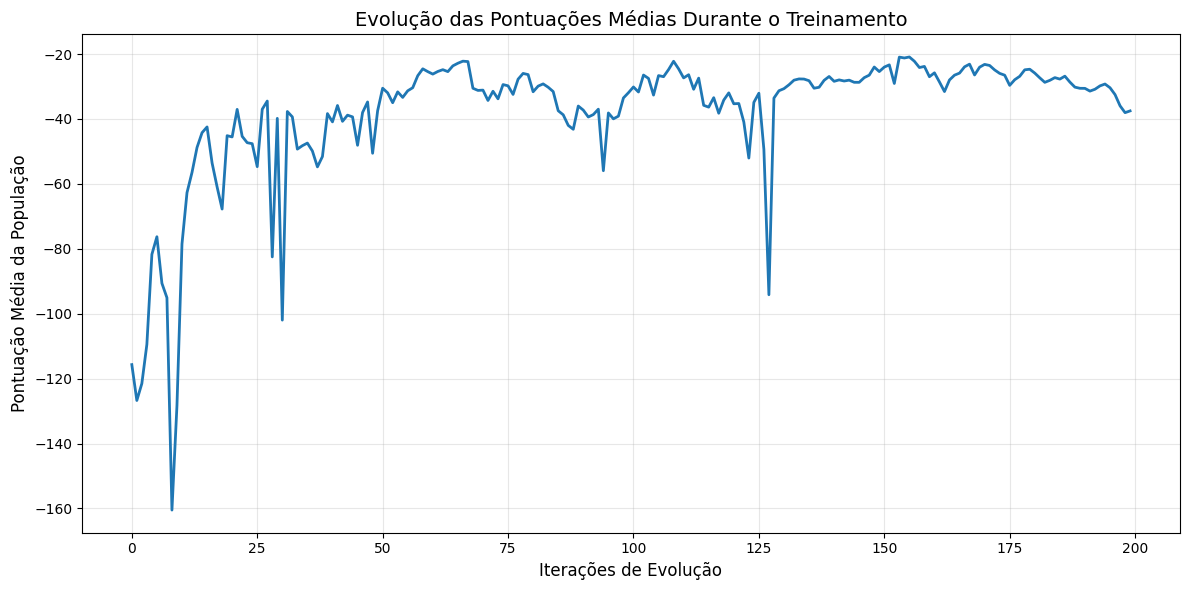

🚀 Training Progress │ 100% │ ████████████████████ │ 2000000/2000000 steps │ ⏱️ 6:36:25 │ ⏳ 00:00 │ 84.09step/s


In [3]:
if __name__ == "__main__":
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print("===== AgileRL Online Multi-Agent Demo =====")

    # Define the network configuration
    NET_CONFIG = {
        "latent_dim": 64,
        "encoder_config": {
            "hidden_size": [64],  # Actor hidden size
        },
        "head_config": {
            "hidden_size": [64],  # Critic hidden size
        },
    }
    

    # Define the initial hyperparameters
    INIT_HP = {
        "POPULATION_SIZE": 4,
        "ALGO": "MATD3",  # Algorithm
        "BATCH_SIZE": 256,  # Batch size
        "O_U_NOISE": True,  # Ornstein Uhlenbeck action noise
        "EXPL_NOISE": 0.05,  # Action noise scale
        "MEAN_NOISE": 0.0,  # Mean action noise
        "THETA": 0.15,  # Rate of mean reversion in OU noise
        "DT": 0.01,  # Timestep for OU noise
        "LR_ACTOR": 0.0005,  # Actor learning rate
        "LR_CRITIC": 0.001,  # Critic learning rate
        "GAMMA": 0.98,  # Discount factor
        "MEMORY_SIZE": 100000,  # Max memory buffer size
        "LEARN_STEP": 50,  # Learning frequency
        "TAU": 0.005,  # For soft update of target parameters
        "POLICY_FREQ": 2,  # Policy frequency
    }

    num_envs = 8

    def make_env():
        return simple_speaker_listener_v4.parallel_env(continuous_actions=True)

    env = make_multi_agent_vect_envs(env=make_env, num_envs=num_envs)

    # Configure the multi-agent algo input arguments
    observation_spaces = [env.single_observation_space(agent) for agent in env.agents]
    action_spaces = [env.single_action_space(agent) for agent in env.agents]

    # Append number of agents and agent IDs to the initial hyperparameter dictionary
    INIT_HP["AGENT_IDS"] = env.agents


    # Mutation config for RL hyperparameters
    hp_config = HyperparameterConfig(
        lr_actor=RLParameter(min=1e-4, max=1e-3),
        lr_critic=RLParameter(min=1e-4, max=5e-3),
        batch_size=RLParameter(min=64, max=256, dtype=int),
        learn_step=RLParameter(
            min=25, max=200, dtype=int, grow_factor=1.5, shrink_factor=0.75
        ),
    )

    # Create a population ready for evolutionary hyper-parameter optimisation
    pop: list[MATD3] = create_population(
    algo=INIT_HP["ALGO"],
    net_config=NET_CONFIG,
    INIT_HP=INIT_HP,
    observation_space=observation_spaces,
    action_space=action_spaces,
    hp_config=hp_config,
    population_size=INIT_HP["POPULATION_SIZE"],
    num_envs=num_envs,
    device=device,
)

    # Configure the multi-agent replay buffer
    field_names = ["obs", "action", "reward", "next_obs", "done"]
    memory = MultiAgentReplayBuffer(
        INIT_HP["MEMORY_SIZE"],
        field_names=field_names,
        agent_ids=INIT_HP["AGENT_IDS"],
        device=device,
    )

    # Instantiate a tournament selection object (used for HPO)
    tournament = TournamentSelection(
        tournament_size=2,  # Tournament selection size
        elitism=True,  # Elitism in tournament selection
        population_size=INIT_HP["POPULATION_SIZE"],  # Population size
        eval_loop=5,  # Evaluate using last N fitness scores
    )


##########################################################################################


    # Estabelece os valores base de mutação (a serem diminuidos de acordo com o tempo)
    base_no_mutation   = 0.4 #
    base_architecture  = 0.05 #
    base_new_layer     = 0.05 #
    base_parameters    = 0.05 #
    base_rl_hp         = 0.1 # 
    base_mutation_sd   = 0.1 #

    # Instantiate a mutations object (used for HPO)
    mutations = Mutations(
        no_mutation=base_no_mutation,
        architecture=base_architecture,
        new_layer_prob=base_new_layer,
        parameters=base_parameters,
        activation=0,
        rl_hp=base_rl_hp,
        mutation_sd=base_mutation_sd,
        rand_seed=1,
        device=device,
    )

########################################################################################################

    # Define training loop parameters
    max_steps = 2_000_000  # Max steps (default: 2000000)
    learning_delay = 0  # Steps before starting learning
    evo_steps = 10_000  # Evolution frequency
    eval_steps = None  # Evaluation steps per episode - go until done
    eval_loop = 5  # Number of evaluation episodes
    elite = pop[0]  # Assign a placeholder "elite" agent
    total_steps = 0
    
    # Lista para armazenar pontuações médias para plotagem
    training_scores_history = []

    # TRAINING LOOP
    print("Training...")
    pbar = default_progress_bar(max_steps)



    while np.less([agent.steps[-1] for agent in pop], max_steps).all():
        pop_episode_scores = []
        for agent in pop:  # Loop through population
            agent.set_training_mode(True)
            obs, info = env.reset()  # Reset environment at start of episode
            scores = np.zeros(num_envs)
            completed_episode_scores = []
            steps = 0
            for idx_step in range(evo_steps // num_envs):
                action, raw_action = agent.get_action(
                    obs=obs, infos=info
                )  # Predict action
                next_obs, reward, termination, truncation, info = env.step(
                    action
                )  # Act in environment

                scores += np.sum(np.array(list(reward.values())).transpose(), axis=-1)
                total_steps += num_envs
                steps += num_envs

                # Save experiences to replay buffer
                memory.save_to_memory(
                    obs,
                    raw_action,
                    reward,
                    next_obs,
                    termination,
                    is_vectorised=True,
                )

                # Learn according to learning frequency
                # Handle learn steps > num_envs
                if agent.learn_step > num_envs:
                    learn_step = agent.learn_step // num_envs
                    if (
                        idx_step % learn_step == 0
                        and len(memory) >= agent.batch_size
                        and memory.counter > learning_delay
                    ):
                        experiences = memory.sample(
                            agent.batch_size
                        )  # Sample replay buffer
                        agent.learn(
                            experiences
                        )  # Learn according to agent's RL algorithm

                # Handle num_envs > learn step; learn multiple times per step in env
                elif (
                    len(memory) >= agent.batch_size and memory.counter > learning_delay
                ):
                    for _ in range(num_envs // agent.learn_step):
                        experiences = memory.sample(
                            agent.batch_size
                        )  # Sample replay buffer
                        agent.learn(
                            experiences
                        )  # Learn according to agent's RL algorithm

                obs = next_obs

                # Calculate scores and reset noise for finished episodes
                reset_noise_indices = []
                term_array = np.array(list(termination.values())).transpose()
                trunc_array = np.array(list(truncation.values())).transpose()
                for idx, (d, t) in enumerate(zip(term_array, trunc_array)):
                    if np.any(d) or np.any(t):
                        completed_episode_scores.append(scores[idx])
                        agent.scores.append(scores[idx])
                        scores[idx] = 0
                        reset_noise_indices.append(idx)

                agent.reset_action_noise(reset_noise_indices)

            pbar.update(evo_steps // len(pop))

            agent.steps[-1] += steps
            pop_episode_scores.append(completed_episode_scores)

        # Evaluate population
        fitnesses = [
            agent.test(
                env,
                max_steps=eval_steps,
                loop=eval_loop,
            )
            for agent in pop
        ]
        mean_scores = [
            (
                np.mean(episode_scores)
                if len(episode_scores) > 0
                else 0
            )
            for episode_scores in pop_episode_scores
        ]
        
        # Salvar pontuação média da população para plotagem
        population_mean_score = np.mean([score for score in mean_scores if isinstance(score, (int, float))])
        training_scores_history.append(population_mean_score)

        mean_scores_display = [
            (
                score if isinstance(score, (int, float))
                else "0 completed episodes"
            )
            for score in mean_scores
        ]

        pbar.write(
            f"--- Global steps {total_steps} ---\n"
            f"Steps {[agent.steps[-1] for agent in pop]}\n"
            f"Scores: {mean_scores_display}\n"
            f"Fitnesses: {['%.2f' % fitness for fitness in fitnesses]}\n"
            f"5 fitness avgs: {['%.2f' % np.mean(agent.fitness[-5:]) for agent in pop]}\n"
            f"Mutations: {[agent.mut for agent in pop]}"
        )

        ######################################################################################################
        

        # Cria a variavel progress
        agent_steps = [a.steps[-1] for a in pop]
        progress = max(agent_steps) / max_steps
        progress = min(max(progress, 0), 1)

        # Separa o treinamento em três: 
        
        if progress < 0.4:
            # Cria a variavel de decaimento 
            decay_factor = 1 - 0.9 * progress

            # Mantem probabilidade de mutacao na arquitetura igual
            # Mantem probabilidade de mutacao new layer igual
            mutations.parameters     = base_parameters * decay_factor
            mutations.rl_hp          = base_rl_hp * decay_factor
            mutations.mutation_sd    = base_mutation_sd * decay_factor
            mutations.no_mutation    = base_no_mutation + (1 - base_no_mutation) * progress

            # Tournament selection and population mutation
            elite, pop = tournament.select(pop)
            pop = mutations.mutation(pop)
        
        elif progress <0.8: 
            # Cria a variavel de decaimento 
            decay_factor = 1 - 0.9 * progress

            mutations.architecture   = 0.01 # Diminui a probalidade de mutacao na arquitetura
            mutations.new_layer_prob = 0.01 # Diminui a probabilidade de mutacao new layer
            mutations.parameters     = base_parameters * decay_factor
            mutations.rl_hp          = base_rl_hp * decay_factor
            mutations.mutation_sd    = base_mutation_sd * decay_factor
            mutations.no_mutation    = base_no_mutation + (1 - base_no_mutation) * progress
            
            # Faz a seleção 
            elite, pop = tournament.select(pop)

            # Separa o melhor agente dos outros  
            others = pop[1:]                  

            # Faz a mutação apenas nos outros
            mutated_others = mutations.mutation(others)

            # Junta eles
            pop = [elite] + mutated_others


        else: # Só faz o torneio, os agentes não passam mais por mutação

            elite, pop = tournament.select(pop)


##################################################################################################################
        # Update step counter
        for agent in pop:
            agent.steps.append(agent.steps[-1])

    # Save the trained algorithm
    path = "./models/MATD3"
    filename = "MATD3_trained_agent.pt"
    os.makedirs(path, exist_ok=True)
    save_path = os.path.join(path, filename)
    elite.save_checkpoint(save_path)
    
    # Plotar e salvar a evolução das pontuações
    plt.figure(figsize=(12, 6))
    plt.plot(training_scores_history, linewidth=2)
    plt.title('Evolução das Pontuações Médias Durante o Treinamento', fontsize=14)
    plt.xlabel('Iterações de Evolução', fontsize=12)
    plt.ylabel('Pontuação Média da População', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    
    # Salvar o gráfico
    plot_path = os.path.join(path, "training_scores_evolution.png")
    plt.savefig(plot_path, dpi=300, bbox_inches='tight')
    print(f"Gráfico de evolução das pontuações salvo em: {plot_path}")
    
    # Salvar dados das pontuações em arquivo numpy
    scores_data_path = os.path.join(path, "training_scores_history.npy")
    np.save(scores_data_path, np.array(training_scores_history))
    print(f"Dados das pontuações salvos em: {scores_data_path}")
    
    plt.show()

    pbar.close()
    env.close()
